In [12]:
# Load packages
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as ticker
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
import numpy as np
import pandas as pd
pd.set_option('max_rows', 6)
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
# import cmocean.cm as cmo
import csv
import statsmodels.api as sm
from scipy import stats

# mpl.rcParams['mathtext.fontset'] = 'cm'
# mpl.rcParams['mathtext.rm'] = 'serif'

x = "Year CE"
phe = r'$\mathrm{\delta}^{15}$N Phe ('u"\u2030)"
eaa_neaa = ['Phe', 'Thr', 'Ile', 'Leu', 'Val', 'Asx', 'Glx', 'Pro', 'Ala', 'Ser', 'Gly'] # For Essential/Non-Essential ordering
tr_srcaa = ['Glu', 'Asp', 'Ala', 'Ile', 'Leu', 'Pro', 'Val', 'Gly', 'Ser', 'Lys', 'Tyr', 'Phe', 'Thr'] # For Trophic/Source AA ordering
n = r'$\mathrm{\delta}^{15}$N ['u"\u2030]"
c = r'$\mathrm{\delta}^{13}$C ['u"\u2030]"
deg = u'SST [\u00B0C]'

# Import data
path1 = '~/Documents/GitHub/data/schiff_bulk_years_07-05-2020.csv'
# path2 = '~/Documents/GitHub/data/schiff_bulk_years_jack4907_12-15-2019.csv'
# path3 = '~/Documents/GitHub/data/schiff_bulk_years_sav_12-15-2019.csv'
# path4 = '~/Documents/GitHub/data/schiff_bulk_years_stetson_12-15-2019.csv'
# path5 = '~/Documents/GitHub/data/schiff_bulk_years_sav_12-22-2019.csv'

df = pd.read_csv(path1, comment = '#')
df.rename(columns={"d15n.vs.air": "d15n", "d13c.vs.vpdb": "d13c", "linear.ad" : "yrAD", 
                   "coral.id" : "coral", "sample.no." : "sample",
                  "secondary.ad" : "yrAD2", "distance..mm." : "distance"}, inplace = True)

# Round yrAD column to make things easier
df.yrAD = df.yrAD.round(0)

# df_jack4684 = df[df.coral == 'jack-4684-bc-unk']
# df_jack4686t1 = df[df.coral == 'jack-4686-bc-d1-t1']

df_stet = df[df.coral == 'stet-4904-bc1-d2']
df_jack4907 = df[df.coral == 'jack-4907-bc1-d3']
df_jack_usgs = df[df.coral == 'jack-4907-bc1-d1']
df_sav = df[df.coral == 'sav-4902-bc1-unk']
df_jack4684 = df[df.coral == 'jack-4684-bc-unk']
df_jack4686 = df[df.coral == 'jack-4686-bc1-d1-t1']
df_jack4686_mill = df[df.coral == 'jack-4686-bc-d1-t1']

print(df)

                    coral sampler  sample  distance  d15n   d13c treatment  \
0        jack-4907-bc1-d3    john       1     0.032  9.43 -15.24         a   
1        jack-4907-bc1-d3    john       2     0.064  9.78 -15.38         a   
2        jack-4907-bc1-d3    john       3     0.096  9.41 -15.14         a   
...                   ...     ...     ...       ...   ...    ...       ...   
1227  jack-4686-bc1-d1-t1    john     123  5904.000   NaN    NaN       NaN   
1228  jack-4686-bc1-d1-t1    john     124  5952.000   NaN    NaN       NaN   
1229  jack-4686-bc1-d1-t1    john     125  6000.000   NaN    NaN       NaN   

      perc.n  perc.c  cn.ratio       machine  yrAD  Unnamed: 12  Unnamed: 13  \
0        NaN     NaN       2.3  deltaplus xp  1362       1362.0          NaN   
1        NaN     NaN       NaN           NaN  1298       1298.0          NaN   
2        NaN     NaN       2.7  deltaplus xp  1266       1266.0          NaN   
...      ...     ...       ...           ...   ...     

## Calculate mean and standard deviation

In [34]:
df = df

meand15n = np.mean(df['d15n'])
meand13c = np.mean(df['d13c'])
d15n_std1 = np.std(df['d15n'])
d13c_std2 = np.std(df['d13c'])
d15n_max = np.amax(df['d15n'])
d15n_min = np.amin(df['d15n'])

print(meand15n)
print(meand13c)
print(d15n_std1)
print(d13c_std2)
print(d15n_max)
print(d15n_min)

8.969857142857144
-16.07136690647482
0.7206514768044316
0.550752528268393
10.89
7.44


In [2]:
df2 = df.loc[:, ['coral', 'd15n', 'd13c', 'yrAD']]
table = df2[df2['coral'] == 'jack-4907-bc1-d3']
table['Diff'] = table['yrAD'].shift(1) - table['yrAD']
print('Jacksonville-4907-BC1', np.mean(table['Diff']), np.std(table['Diff']))

table = df2[df2['coral'] == 'stet-4904-bc1-d2']
table['Diff'] = table['yrAD'].shift(1) - table['yrAD']
print('Stetson-4904-BC1', np.mean(table['Diff']), np.std(table['Diff']))

table = df2[df2['coral'] == 'sav-4902-bc1-unk']
table['Diff'] = table['yrAD'].shift(1) - table['yrAD']
print('Savannah-4902-BC1', np.mean(table['Diff']), np.std(table['Diff']))

Jacksonville-4907-BC1 7.378548895899054 10.46468812620995
Stetson-4904-BC1 3.322077922077922 1.648346150809713
Savannah-4902-BC1 10.690647482014388 7.278478100925987


/Users/jts/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/jts/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/jts/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

In [6]:
first = df_jack4907[df_jack4907['yrAD'] > 451] # 40 years
second = df_jack4907[(df_jack4907['yrAD'] < 450) & (df_jack4907['yrAD'] > -260)] # 10 years
third = df_jack4907[df_jack4907['yrAD'] < -255] # 3 years

third = third.loc[:, ['coral', 'distance', 'd15n', 'd13c', 'yrAD']]
third.to_csv('jack4907.txt', header=None, index=None, sep='\t', mode='a')

In [102]:
table = df2[df2['coral'] == 'stet-4904-bc1-d2']
table['Diff'] = table['yrAD'].shift(1) - table['yrAD']
table

/Users/jts/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,coral,d15n,d13c,yrAD,Diff
579,stet-4904-bc1-d2,9.240000,-16.910000,2005,NaN
580,stet-4904-bc1-d2,9.240000,-16.840000,1993,12.0
581,stet-4904-bc1-d2,9.630000,-16.910000,1987,6.0
582,stet-4904-bc1-d2,8.880000,-16.400000,1982,5.0
583,stet-4904-bc1-d2,9.340000,-16.820000,1976,6.0
584,stet-4904-bc1-d2,9.350000,-16.620000,1970,6.0
585,stet-4904-bc1-d2,9.500000,-16.990000,1964,6.0
586,stet-4904-bc1-d2,10.160000,-16.510000,1958,6.0
587,stet-4904-bc1-d2,9.100000,-16.620000,1953,5.0
588,stet-4904-bc1-d2,9.150000,-16.730000,1947,6.0


In [46]:
table = df[df['yrAD'] < 1800]
table

print(np.mean(table['d15n']))
print(np.std(table['d15n']))

8.295558656061864
0.6972200550352122


# Paleoclimate data

In [2]:
# load paleoclimate datasets
# R code
# Richey 2009; Gulf of Mexico
# fisk <- read.csv('~/Documents/GitHub/data/paleoclimate_data/richey2009-fisk.csv', header = TRUE)
# garrison <- read.csv('~/Documents/GitHub/data/paleoclimate_data/richey2009-garrison.csv', header = TRUE)

# Richey 2007; Gulf of Mexico
richey2007 = pd.read_csv('~/Documents/GitHub/data/paleoclimate_data/richey2007.csv')
richey2007.rename(columns={"Cal yr B.P.":"yrBP", "Core Depth (mm)":"depth (mm)", "% G. sacculifer":"percent gsacc"}, inplace = True)
richey2007["yrAD"] = 1950 - richey2007["yrBP"]

# Richey 2009; Gulf of Mexico
fisk = pd.read_csv('~/Documents/GitHub/data/paleoclimate_data/richey2009-fisk.csv')
fisk.rename(columns={"Core Depth (mm)":"depth (mm)"}, inplace = True)
fisk["yrAD"] = 1950 - fisk["yrBP"]

garrison = pd.read_csv('~/Documents/GitHub/data/paleoclimate_data/richey2009-garrison.csv')
garrison.rename(columns={"Core Depth (mm)":"depth (mm)"}, inplace = True)
garrison["yrAD"] = 1950 - garrison["yrBP"]

# Saenger 2009; Bahamas SST
saenger2009 = pd.read_csv('~/Documents/GitHub/data/paleoclimate_data/bahamas2009sst.csv')
saenger2009["yrBP"] = 1950 - saenger2009["yrAD"]

# Saenger 2011; Carolina slope
core1 = pd.read_csv('~/Documents/GitHub/data/paleoclimate_data/saenger2011_core1.csv')
core1.rename(columns={"Year(AD)":"yrAD"}, inplace = True)
core1["yrBP"] = 1950 - core1["yrAD"]

core2 = pd.read_csv('~/Documents/GitHub/data/paleoclimate_data/saenger2011_core2.csv')
core2.rename(columns={"Year(AD)":"yrAD"}, inplace = True)
core2["yrBP"] = 1950 - core2["yrAD"]

# Keigwin 1996; Bermuda rise
k4a = pd.read_table('~/Documents/GitHub/data/paleoclimate_data/bc004a-tab.txt', comment = "#", sep = '\t', header = 0)
k4a.rename(columns={"yrBP ":"yrBP"}, inplace = True)
k4a["yrAD"] = 1950 - k4a["yrBP"]

k4d = pd.read_table('~/Documents/GitHub/data/paleoclimate_data/bc004d-tab.txt', comment = "#", sep = '\t', header = 0)
k4d.rename(columns={"yrBP ":"yrBP"}, inplace = True)
k4d["yrAD"] = 1950 - k4d["yrBP"]

k4d_rub = k4d[k4d["carb%"] == -999]
k4d_carb = k4d[k4d["d18Og.rub"] == -999]

lundmc62 = pd.read_table('~/Documents/GitHub/data/paleoclimate_data/lund2006mc62.csv', comment = "#", sep = ',', header = 0)
lundmc62['yrAD'] = 1950 - lundmc62['CalAge1']

lawdomeco2 = pd.read_table('~/Documents/GitHub/data/paleoclimate_data/law2018d13c-co2.txt', comment = "#", sep = '\t', header = 0)
lawdomeco2['yrAD'] = lawdomeco2['age_CO2']

lawdomeco2 = pd.read_table('~/Documents/GitHub/data/paleoclimate_data/law2018d13c-co2.txt', comment = "#", sep = '\t', header = 0)
lawdomeco2['yrAD'] = lawdomeco2['age_CO2']

wurtzel = pd.read_table('~/Documents/GitHub/data/paleoclimate_data/wurtzel2013-composite.txt', comment = "#", sep = '\t', header = 0)
wurtzel['yrAD'] = wurtzel['age_AD']
wurtzel['winter_spring'] = wurtzel['sst-mg/ca-g.bull']
wurtzel['summer'] = wurtzel['sst-mg/ca-g.rub-p']

### Calculate Trophic Position based on bulk d15N

In [2]:
# TP = ((d15Nconsumer - d15Nproducer)/3.4) + 1

In [27]:
myfile = '~/Documents/GitHub/data/cleaned_ndata_07-06-2020.csv'
ndata = pd.read_csv(myfile, sep=',') 
# ndata

In [28]:
filter1 = ndata[(ndata['Region'] == 'SEUS') | (ndata['Region'] == 'Gulf of Mexico')]
filter2 = ndata[(ndata['Region'] == 'SEUS')]
# filter2 = filter2.loc[filter2["Phe"] < 13]
ndata = filter2
# ndata

In [29]:
# TP = ((d15Nconsumer - d15Nproducer)/3.4) + 1
d15Nprod = 2.1 # Based on communication with Nancy
ndata['TP_bulk'] = ((ndata['Bulk'] - d15Nprod)/3.4 +1)
# ndata

In [30]:
ndata['error'] = [1.0,1.1,1.1,0.4,0.3,0.5,0.1,0.0,0.0,0.0,0.0,1.0,1.0,1.9,1.1,0.9]
ndata = ndata.loc[ndata["Phe"] < 13]

In [31]:
ndata.loc[:,'glu_error'] = [1,1,1,1.8,1,1,1,1,1,1.9,1,1,1,1,1]
ndata[ndata['Sample ID2'] == 'Jacksonville-4907']

,Sample ID,Sample ID2,Type,Region,Bulk,Glu,Asp,Ala,Ile,Leu,...,Lys,Tyr,Phe,Thr,Met,Arg,Year CE,TP_bulk,error,glu_error
7,jack-4907-bc1_23,Jacksonville-4907,Black Coral - SEUS,SEUS,8.69,16.9,14.5,19.3,19.2,19.4,...,NaN,NaN,10.9,NaN,NaN,NaN,682.0,2.938235,0.0,1.0
9,jack-4907-bc1_56,Jacksonville-4907,Black Coral - SEUS,SEUS,8.99,15.5,12.3,15.2,19.7,19.3,...,NaN,NaN,9.6,NaN,NaN,NaN,33.0,3.026471,0.0,1.0
10,jack-4907-bc1_134,Jacksonville-4907,Black Coral - SEUS,SEUS,8.21,14.5,14.5,14.1,20.0,16.8,...,NaN,NaN,9.4,NaN,NaN,NaN,-358.0,2.797059,0.0,1.9


In [17]:
# fig1, ax1 = plt.subplots()
# ax1.set_title('Basic Plot')
# ndata.boxplot(by='Sample ID2') # Need to just filter this out, maker dataset cleaner first

In [3]:
# myfile = '~/Documents/GitHub/data/cleaned_ndata_06-17-2020.csv'
# corals = pd.read_csv(myfile, sep=',') 
# corals = corals[(corals['Region'] == 'SEUS') | (corals['Region'] == 'Gulf of Mexico')]

# markersize = 10

# seus = corals[corals['Type'] == 'Black Coral - SEUS']
# gom = corals[corals['Type'] == 'Black Coral - GOM']
# pom = corals[corals['Type'] == 'POM - GOM']

# fig = plt.figure(figsize=(6,5))
# ax = fig.add_subplot(111)
# ax.set_xlabel(r'$\Sigma$V', size = 12)
# ax.set_ylabel('Trophic Position (Glu - Phe)', size = 12)

# plt.plot('Sum V', 'TP', data = seus, label = "SEUS", marker = "s", linestyle = "", color = "#af8dc3", markeredgecolor = "k", markersize = markersize)
# ax.tick_params(direction='in', which = 'both')

# plt.plot('Sum V', 'TP', data = gom, label = "GOM", marker = "D", linestyle = "", color = "#7fbf7b", markeredgecolor = "k", markersize = markersize)
# ax.tick_params(direction='in', which = 'both')

# plt.plot('Sum V', 'TP', data = pom, label = "POM", marker = "o", linestyle = "", color = "#ffffbf", markeredgecolor = "k", markersize = markersize)
# ax.tick_params(direction='in', which = 'both')
               
# # Legend
# plt.legend(frameon=False)

# # ax.set_ylim(0.5,3)
# # ax.set_xlim(2,4.5)
# ax.yaxis.set_major_locator(ticker.MaxNLocator(6))

# size1 = 12
# for tick in ax.get_xticklabels():
#     tick.set_fontname("Helvetica")
#     tick.set_fontsize(size1)
# for tick in ax.get_yticklabels():
#     tick.set_fontname("Helvetica")
#     tick.set_fontsize(size1)

# # Save figure
# plt.savefig('fig_tp_sumv_xy.png', dpi=300, bbox_inches='tight')

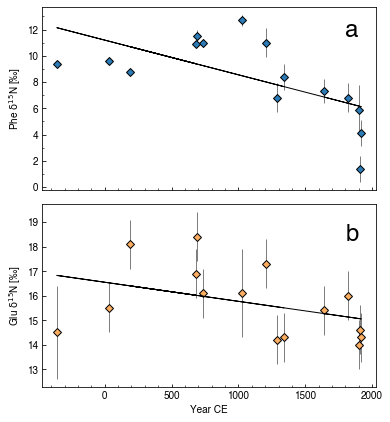

In [32]:
fig, axs = plt.subplots(2, sharex = True, figsize = (6,7),
                       gridspec_kw={'hspace': 0.075})

markersize = 5

# SEUS
axs[0].plot('Year CE', 'Phe', data = ndata, label = "", marker = "D", linestyle = "", color = "#2c7bb6", markeredgecolor = "k", markersize = markersize)
axs[1].plot('Year CE', 'Glu', data = ndata, label = "", marker = "D", linestyle = "", color = "#fdae61", markeredgecolor = "k", markersize = markersize)

x = ndata['Year CE']
y = ndata['Phe']

(m, b) = np.polyfit(x, y, 1)
yp = np.polyval([m, b], x)
axs[0].plot(x, yp, color = 'black', linewidth = 1)

x = ndata['Year CE']
y = ndata['Glu']

(m, b) = np.polyfit(x, y, 1)
yp = np.polyval([m, b], x)
axs[1].plot(x, yp, color = 'black', linewidth = 1)

# Legend
# axs[0].legend(frameon=False, loc = 2)
# axs[1].legend(frameon=False, loc = 0)

axs[1].set_xlabel("Year CE")
axs[0].set_ylabel(r'Phe $\mathrm{\delta}^{15}$N ['u"\u2030]")
axs[1].set_ylabel(r'Glu $\mathrm{\delta}^{15}$N ['u"\u2030]")

# Error bars
axs[0].errorbar(ndata['Year CE'],ndata['Phe'], yerr=[ndata['error'],ndata['error']], fmt='o', color = 'black', linewidth = 0.5, markerfacecolor = 'None', markeredgecolor = 'None')
axs[1].errorbar(ndata['Year CE'],ndata['Glu'], yerr=[ndata['glu_error'],ndata['glu_error']], fmt='o', color = 'black', linewidth = 0.5, markerfacecolor = 'None', markeredgecolor = 'None')

# axs[0].set_ylim(0.5,3)
# axs[1].set_ylim(0.5,3)

xminor = 100
yminor = 1

axs[0].xaxis.set_minor_locator(MultipleLocator(xminor))
axs[0].yaxis.set_minor_locator(MultipleLocator(yminor))
axs[1].xaxis.set_minor_locator(MultipleLocator(xminor))
axs[1].yaxis.set_minor_locator(MultipleLocator(yminor))

# axs[1].yaxis.set_major_locator(ticker.MaxNLocator(4))

axs[0].tick_params(direction='in', which = 'both')
axs[1].tick_params(direction='in', which = 'both')

style = dict(size=24, color='black', fontweight = 'bold')
axs[0].text(1800, 11.5, 'a', **style)
axs[1].text(1800, 18.25, 'b', **style)

plt.savefig('fig_glu_phe_comparison2.png', dpi = 300, bbox_inches='tight')

In [34]:
ndata.info()
ndata['offsetTP'] = ndata['offsetTP'].astype(float)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 0 to 15
Data columns (total 24 columns):
Sample ID     15 non-null object
Sample ID2    15 non-null object
Type          15 non-null object
Region        15 non-null object
Bulk          15 non-null float64
Glu           15 non-null float64
Asp           15 non-null float64
Ala           15 non-null float64
Ile           15 non-null float64
Leu           15 non-null float64
Pro           15 non-null float64
Val           15 non-null float64
Gly           15 non-null float64
Ser           15 non-null float64
Lys           0 non-null float64
Tyr           0 non-null float64
Phe           15 non-null float64
Thr           0 non-null float64
Met           0 non-null float64
Arg           0 non-null float64
Year CE       15 non-null float64
TP_bulk       15 non-null float64
error         15 non-null float64
glu_error     15 non-null float64
dtypes: float64(20), object(4)
memory usage: 2.9+ KB


KeyError: 'offsetTP'

ValueError: Unrecognized character f in format string

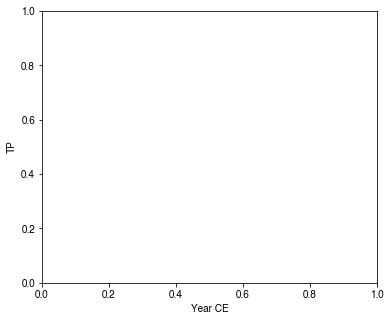

In [35]:
# Subset the data
# NOTE: It is possible to write a for loop to do this, but I am doing this to save time
# https://stackoverflow.com/questions/21654635/scatter-plots-in-pandas-pyplot-how-to-plot-by-category

n_jack = ndata[ndata['Sample ID2']=='Jacksonville-4907']
n_jack2 = ndata[ndata['Sample ID2']=='Jacksonville-4684']
n_sav = ndata[ndata['Sample ID2']=='Savannah Banks-4902']
markersize = 8

fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111)
ax.set_xlabel("Year CE")
# ax.set_ylabel(r'Phe $\mathrm{\delta}^{15}$N ['u"\u2030]")
ax.set_ylabel('TP')

plt.plot('Year CE', 'offsetTP', data = n_jack, label = "Jacksonville-4907", marker = "D", linestyle = "--", color = "#2c7fb8", markeredgecolor = "k", markersize = markersize)
plt.plot('Year CE', 'offsetTP', data = n_jack2, label = "Jacksonville-4684", marker = "s", linestyle = "--", color = "#41b6c4", markeredgecolor = "k", markersize = markersize)
plt.plot('Year CE', 'offsetTP', data = n_sav, label = "Savannah-4902", marker = "^", linestyle = "--", color = "#a1dab4", markeredgecolor = "k", markersize = markersize)

ax.tick_params(direction='in')
               
# Legend
plt.legend(frameon=False)

# Save figure
# plt.savefig('fig_phe_time_2.png', dpi=300, bbox_inches='tight')

In [39]:
# Calculation: d15N (predicted) = (TP * d15N-source) + d15N-source or d15N-phe (try both)
nitrate = 5 # d15N of nitrate based on depth profiles
src = 8 # d15N of source nitrate or Phe depending on test you want to do
enrichment = 3 # How much d15N enriches with each trophic transfer, in permil

test = (1.7 * enrichment) + src
print(test)

corals = ndata
corals['d15N_pred'] = (corals['TP'] * enrichment) + nitrate

13.1


/Users/jts/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


9.966666666666667 0.6649979114420002 119.0 428.9110241841152
5.1 2.1475567512873788 1838.4 104.14720351502483
10.028571428571428 1.9188644601238853 924.0 382.3760303306532


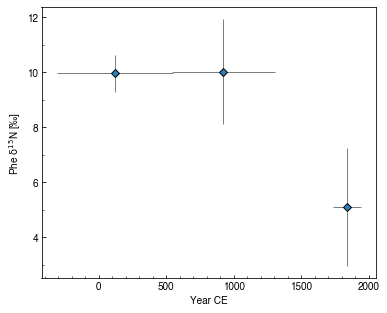

In [36]:
n_jack = ndata[ndata['Sample ID2']=='Jacksonville-4907']
n_jack2 = ndata[ndata['Sample ID2']=='Jacksonville-4684']
n_sav = ndata[ndata['Sample ID2']=='Savannah Banks-4902']

phe1 = np.mean(n_jack['Phe'])
phe2 = np.mean(n_jack2['Phe'])
phe3 = np.mean(n_sav['Phe'])
std1 = np.std(n_jack['Phe'])
std2 = np.std(n_jack2['Phe'])
std3 = np.std(n_sav['Phe'])
yr1 = np.mean(n_jack['Year CE'])
yr2 = np.mean(n_jack2['Year CE'])
yr3 = np.mean(n_sav['Year CE'])
yrstd1 = np.std(n_jack['Year CE'])
yrstd2 = np.std(n_jack2['Year CE'])
yrstd3 = np.std(n_sav['Year CE'])


print(phe1, std1, yr1, yrstd1)
print(phe2, std2, yr2, yrstd2)
print(phe3, std3, yr3, yrstd3)

data = {'coral':  ['Jacksonville-4907-BC1', 'Jacksonville-4684-BC1','Savannah-4902-BC1'],
        'phe': [phe1, phe2, phe3],
        'phe_sd': [std1, std2, std3],
        'yr': [yr1, yr2, yr3],
        'yr_sd': [yrstd1, yrstd2, yrstd3]
        }

df1 = pd.DataFrame(data,
                   columns=['coral', 'phe', 'phe_sd', 'yr', 'yr_sd'])

fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111)
ax.set_xlabel("Year CE")
ax.set_ylabel(r'Phe $\mathrm{\delta}^{15}$N ['u"\u2030]")
markersize = 6
linewidth = 0.0

plt.plot('yr', 'phe', data = df1, label = "Jacksonville-4907", marker = "D", linewidth = linewidth, linestyle = "--", color = "#2c7fb8", markeredgecolor = "k", markersize = markersize)
plt.errorbar(df1['yr'],df1['phe'], yerr=[df1['phe_sd'],df1['phe_sd']], fmt='o', color = 'black', linewidth = 0.5, markerfacecolor = 'None', markeredgecolor = 'None')
plt.errorbar(df1['yr'],df1['phe'], xerr=[df1['yr_sd'], df1['yr_sd']], fmt='o', color = 'black', linewidth = 0.5, markerfacecolor = 'None', markeredgecolor = 'None')

ax.tick_params(direction='in', which = 'both')
ax.xaxis.set_minor_locator(MultipleLocator(100))
ax.yaxis.set_minor_locator(MultipleLocator(1))


In [2]:
# # Subset the data
# # NOTE: It is possible to write a for loop to do this, but I am doing this to save time
# # https://stackoverflow.com/questions/21654635/scatter-plots-in-pandas-pyplot-how-to-plot-by-category

Writing this down so I don't forget. Maybe the source water being mixed into the euphotic zone DID have a larger d15N-NO3 value. Maybe there was a dual situation with nitrogen fixation along the outer continental shelf because of greater straitification and less mixing? It appears that there are two different biogeochemical regimes, but we are not any closer to determining what the cause of recent change is. 
7-5-2020 Note: Redo calculation for estimating the bulk d15N value based on the estimated trophic position. 

Hypothesis: nutrients transported to the SAB had elevated d15N-NO3 values in the past (though they were still ~5 in the GOM corals at 300CE) due to some sort of climatic event that also may have caused increased stratification which would provide more opportunity for nitrogen fixation to occur at Stetson which is out on the Blake Plateau.

For GOM CORALS: The low nitrate values for those could actually just be due to riverine nitrate, which is known to be fairly low (I have a citation for this somewhere). 

In [10]:
# df_stet['tp'] = ((df_stet['d15n'] - d15Nprod)/3.4 +1)
# df_stet

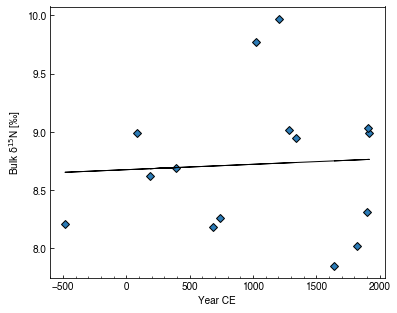

In [65]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111)

markersize = 5

# SEUS
ax.plot('Year CE', 'Bulk', data = ndata, label = "", marker = "D", linestyle = "", color = "#2c7bb6", markeredgecolor = "k", markersize = markersize)
x = ndata['Year CE']
y = ndata['Bulk']

(m, b) = np.polyfit(x, y, 1)
yp = np.polyval([m, b], x)
ax.plot(x, yp, color = 'black', linewidth = 1)

ax.set_xlabel("Year CE")
ax.set_ylabel(r'Bulk $\mathrm{\delta}^{15}$N ['u"\u2030]")

xminor = 100
yminor = 1

ax.xaxis.set_minor_locator(MultipleLocator(xminor))
ax.yaxis.set_minor_locator(MultipleLocator(yminor))

ax.tick_params(direction='in', which = 'both')

# plt.savefig('fig_glu_phe_comparison.png', dpi = 300, bbox_inches='tight')

In [57]:
# fig, axs = plt.subplots(2, sharex = True, figsize = (6,7),
#                        gridspec_kw={'hspace': 0.075})

# Plotting with Rolling Mean

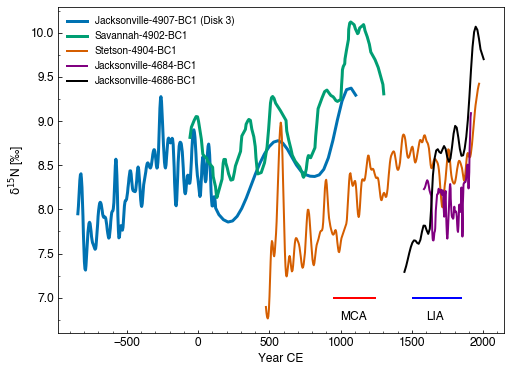

In [41]:
fig, ax = plt.subplots(figsize = (8,6))

window = 15
windowtype = 'blackman'
alpha = 0.25

data = df_jack4907
data.loc[:,'rolling'] = data["d15n"].rolling(window, win_type= windowtype, center = True).mean()
rolling_std = 1 * data["d15n"].rolling(window, center = True).std()
# ax.plot('yrAD', 'd15n', data=data, color = '#0072B2', linewidth = 1, label = '', alpha = alpha)
ax.plot('yrAD', 'rolling', data=data, color = '#0072B2', linewidth = 3, label = 'Jacksonville-4907-BC1 (Disk 3)')
# ax.fill_between(data['yrAD'], data['rolling']-1*rolling_std, 
#                  data['rolling']+1*rolling_std, color='b', alpha=1)

# data = first
# data.loc[:,'rolling'] = data["d15n"].rolling(2, win_type= windowtype, center = True).mean()
# rolling_std = 1 * data["d15n"].rolling(window, center = True).std()
# ax.plot('yrAD', 'rolling', data=data, color = '#0072B2', linewidth = 2, label = 'Jacksonville-4907-BC1 (Disk 3)')
# data = second
# data.loc[:,'rolling'] = data["d15n"].rolling(7, win_type= windowtype, center = True).mean()
# rolling_std = 1 * data["d15n"].rolling(window, center = True).std()
# ax.plot('yrAD', 'rolling', data=data, color = '#0072B2', linewidth = 2, label = '')
# data = third
# data.loc[:,'rolling'] = data["d15n"].rolling(20, win_type= windowtype, center = True).mean()
# rolling_std = 1 * data["d15n"].rolling(window, center = True).std()
# ax.plot('yrAD', 'rolling', data=data, color = '#0072B2', linewidth = 2, label = '')

data = df_sav
data.loc[:,'rolling'] = data["d15n"].rolling(15, win_type= windowtype, center = True).mean()
# ax.plot('yrAD', 'd15n', data=data, color = '#009E73', linewidth = 1, label = '', alpha = alpha)
ax.plot('yrAD', 'rolling', data=data, color = '#009E73', linewidth = 3, label = 'Savannah-4902-BC1')

data = df_stet
data.loc[:,'rolling'] = data["d15n"].rolling(15, win_type=windowtype, center = True).mean()
# ax.plot('yrAD', 'd15n', data=data, color = '#D55E00', linewidth = 1, label = '', alpha = alpha)
ax.plot('yrAD', 'rolling', data=data, color = '#D55E00', linewidth = 2, label = 'Stetson-4904-BC1')

data = df_jack4684
data.loc[:,'rolling'] = data["d15n"].rolling(10, win_type= windowtype, center = True).mean()
# ax.plot('yrAD', 'd15n', data=data, color = 'purple', linewidth = 1, label = '', alpha = alpha)
ax.plot('yrAD', 'rolling', data=data, color = 'purple', linewidth = 2, label = 'Jacksonville-4684-BC1')

data = df_jack4686_mill
data.loc[:,'rolling'] = data["d15n"].rolling(10, win_type= windowtype, center = True, min_periods=1).mean()
# ax.plot('yrAD', 'd15n', data=data, color = 'black', linewidth = 1, label = '', alpha = alpha)
ax.plot('yrAD', 'rolling', data=data, color = 'black', linewidth = 2, label = 'Jacksonville-4686-BC1')

ax.set_xlabel("Year CE", fontname = 'Helvetica', size = 12)
ax.set_ylabel(n, fontname = 'Helvetica', size = 12)

for tick in ax.get_xticklabels():
    tick.set_fontname("Helvetica")
    tick.set_fontsize(12)
for tick in ax.get_yticklabels():
    tick.set_fontname("Helvetica")
    tick.set_fontsize(12)
    
ax.xaxis.set_minor_locator(MultipleLocator(100))
ax.yaxis.set_minor_locator(MultipleLocator(0.25))
ax.tick_params(direction='in', which = 'both')
# ax.set_xlim(-400, 1500)

ax.hlines(y=7, xmin = 950, xmax = 1250, color='r', lw=2)
ax.hlines(y=7, xmin = 1500, xmax = 1850, color='b', lw=2)
ax.text(y=6.75, x=1000, s='MCA', fontsize = 12)
ax.text(y=6.75, x=1600, s='LIA', fontsize = 12)

plt.legend(frameon=False, loc=0)

plt.savefig('fig_bulk_n_group_rolling2.png', dpi = 300, bbox_inches = 'tight')

We know that the values for Stetson are low during the MCA compared to the two continental slope corals. These valuesa are reminiscent of nitrogen fixation based on the bulk d15N values of corals in similar situations and the fact that the Stetson coral is further out on the continental plateau where nitrogen fixation could potentially occur more readily. The continental slope corals are more dependent on inner shelf dynamics. 

### Medieval Climate Anomaly

In [38]:
# fig, ax = plt.subplots(figsize = (8,6))

# window = 2
# windowtype = 'blackman'
# alpha = 0.25

# data = df_jack4907
# data.loc[:,'rolling'] = data["d15n"].rolling(window, win_type= windowtype, center = True).mean()
# ax.plot('yrAD', 'd15n', data=data, color = 'navy', linewidth = 1, label = '', alpha = alpha)
# ax.plot('yrAD', 'rolling', data=data, color = 'navy', linewidth = 3, label = 'Jacksonville-4907-BC1 (Disk 3)')

# ax.set_xlabel("Year CE", fontname = 'Helvetica', size = 12)
# ax.set_ylabel(n, fontname = 'Helvetica', size = 12)

# for tick in ax.get_xticklabels():
#     tick.set_fontname("Helvetica")
#     tick.set_fontsize(12)
# for tick in ax.get_yticklabels():
#     tick.set_fontname("Helvetica")
#     tick.set_fontsize(12)
    
# ax.xaxis.set_minor_locator(MultipleLocator(50))
# ax.yaxis.set_minor_locator(MultipleLocator(0.25))
# ax.tick_params(direction='in', which = 'both')
# ax.set_xlim(-900, -200)

# plt.legend(frameon=False, loc=0)

# plt.savefig('fig_bulk_n_jack_rolling.png', dpi = 300, bbox_inches = 'tight')

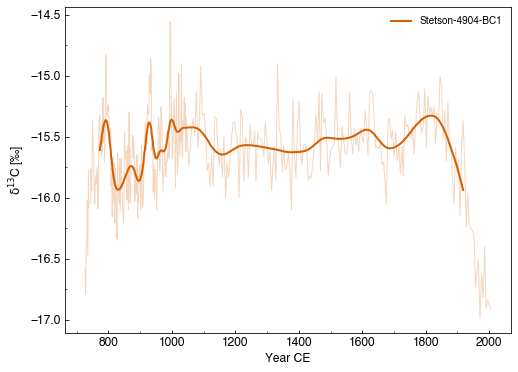

In [26]:
fig, ax = plt.subplots(figsize = (8,6))

window = 5
windowtype = 'blackman'
alpha = 0.25

data = df_stet
data.loc[:,'rolling'] = data["d13c"].rolling(35, win_type= windowtype, center = True).mean()
ax.plot('yrAD', 'd13c', data=data, color = '#D55E00', linewidth = 1, label = '', alpha = alpha)
ax.plot('yrAD', 'rolling', data=data, color = '#D55E00', linewidth = 2, label = 'Stetson-4904-BC1')

ax.set_xlabel("Year CE", fontname = 'Helvetica', size = 12)
ax.set_ylabel(c, fontname = 'Helvetica', size = 12)

for tick in ax.get_xticklabels():
    tick.set_fontname("Helvetica")
    tick.set_fontsize(12)
for tick in ax.get_yticklabels():
    tick.set_fontname("Helvetica")
    tick.set_fontsize(12)
    
ax.xaxis.set_minor_locator(MultipleLocator(100))
ax.yaxis.set_minor_locator(MultipleLocator(0.25))
ax.tick_params(direction='in', which = 'both')
# ax.set_xlim(-400, 1500)

plt.legend(frameon=False, loc=0)

plt.savefig('fig_bulk_c_stet_rolling.png', dpi = 300, bbox_inches = 'tight')

Text(0, 0.5, '$\\mathrm{\\delta}^{15}$N [‰]')

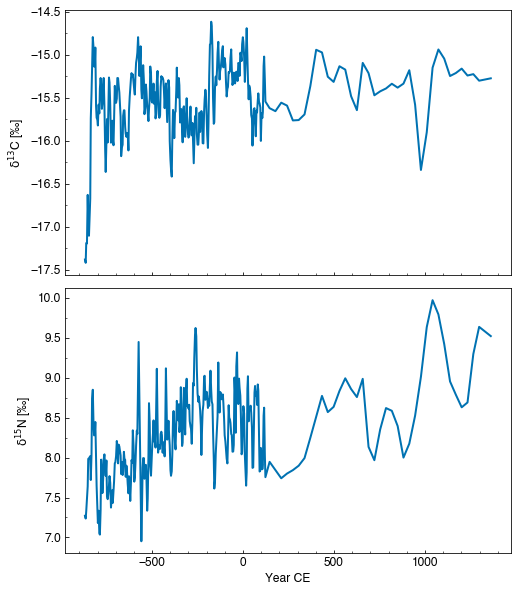

In [38]:
fig, axs = plt.subplots(2, sharex = True, 
                        gridspec_kw={'hspace': 0.05},
                       figsize = (8,10))
# fig.suptitle('Vertically stacked subplots')
table = df_jack4907
data = table
data.loc[:,'rolling'] = data["d13c"].rolling(window, win_type= windowtype, center = True, min_periods=1).mean()
axs[0].plot('yrAD', 'rolling', data=data, color = '#0072B2', linewidth = 2, label = 'Stetson-4904-BC1')

data = table
data.loc[:,'rolling'] = data["d15n"].rolling(window, win_type= windowtype, center = True, min_periods=1).mean()
axs[1].plot('yrAD', 'rolling', data=data, color = '#0072B2', linewidth = 2, label = 'Stetson-4904-BC1')

for tick in axs[1].get_xticklabels():
    tick.set_fontname("Helvetica")
    tick.set_fontsize(12)
for tick in axs[1].get_yticklabels():
    tick.set_fontname("Helvetica")
    tick.set_fontsize(12)
for tick in axs[0].get_xticklabels():
    tick.set_fontname("Helvetica")
    tick.set_fontsize(12)
for tick in axs[0].get_yticklabels():
    tick.set_fontname("Helvetica")
    tick.set_fontsize(12)

axs[0].xaxis.set_minor_locator(MultipleLocator(100))
axs[0].yaxis.set_minor_locator(MultipleLocator(0.25))
axs[0].tick_params(direction='in', which = 'both')

axs[1].xaxis.set_minor_locator(MultipleLocator(100))
axs[1].yaxis.set_minor_locator(MultipleLocator(0.25))
axs[1].tick_params(direction='in', which = 'both')

# Draw x label
axs[1].set_xlabel("Year CE", fontsize = 12)

# Draw y label
axs[0].set_ylabel(c, fontsize = 12)
axs[1].set_ylabel(n, fontsize = 12)

Text(0, 0.5, '$\\mathrm{\\delta}^{15}$N [‰]')

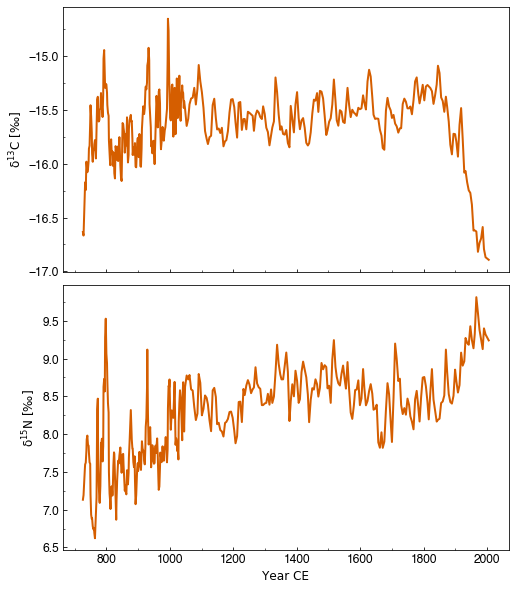

In [12]:
fig, axs = plt.subplots(2, sharex = True, 
                        gridspec_kw={'hspace': 0.05},
                       figsize = (8,10))
# fig.suptitle('Vertically stacked subplots')
data = df_stet
data.loc[:,'rolling'] = data["d13c"].rolling(window, win_type= windowtype, center = True, min_periods=1).mean()
axs[0].plot('yrAD', 'rolling', data=data, color = '#D55E00', linewidth = 2, label = 'Stetson-4904-BC1')

data = df_stet
data.loc[:,'rolling'] = data["d15n"].rolling(window, win_type= windowtype, center = True, min_periods=1).mean()
axs[1].plot('yrAD', 'rolling', data=data, color = '#D55E00', linewidth = 2, label = 'Stetson-4904-BC1')

for tick in axs[1].get_xticklabels():
    tick.set_fontname("Helvetica")
    tick.set_fontsize(12)
for tick in axs[1].get_yticklabels():
    tick.set_fontname("Helvetica")
    tick.set_fontsize(12)
for tick in axs[0].get_xticklabels():
    tick.set_fontname("Helvetica")
    tick.set_fontsize(12)
for tick in axs[0].get_yticklabels():
    tick.set_fontname("Helvetica")
    tick.set_fontsize(12)

axs[0].xaxis.set_minor_locator(MultipleLocator(100))
axs[0].yaxis.set_minor_locator(MultipleLocator(0.25))
axs[0].tick_params(direction='in', which = 'both')

axs[1].xaxis.set_minor_locator(MultipleLocator(100))
axs[1].yaxis.set_minor_locator(MultipleLocator(0.25))
axs[1].tick_params(direction='in', which = 'both')

# Draw x label
axs[1].set_xlabel("Year CE", fontsize = 12)

# Draw y label
axs[0].set_ylabel(c, fontsize = 12)
axs[1].set_ylabel(n, fontsize = 12)

/Users/jts/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/jts/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


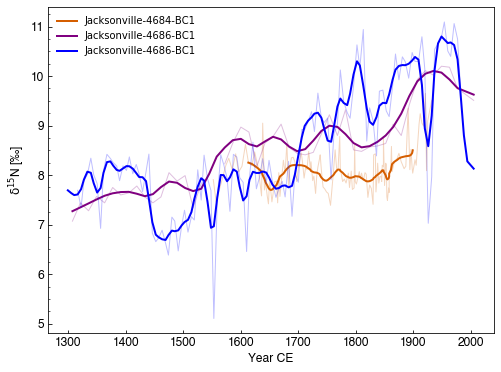

In [2]:
fig, ax = plt.subplots(figsize = (8,6))

window = 8
windowtype = 'blackman'
alpha = 0.25

data = df_jack4684
data.loc[:,'rolling'] = data["d15n"].rolling(20, win_type= windowtype, center = True).mean()
ax.plot('yrAD', 'd15n', data=data, color = '#D55E00', linewidth = 1, label = '', alpha = alpha)
ax.plot('yrAD', 'rolling', data=data, color = '#D55E00', linewidth = 2, label = 'Jacksonville-4684-BC1')

data = df_jack4686_mill
data.loc[:,'rolling'] = data["d15n"].rolling(8, win_type= windowtype, center = True, min_periods=1).mean()
ax.plot('yrAD', 'd15n', data=data, color = 'purple', linewidth = 1, label = '', alpha = alpha)
ax.plot('yrAD', 'rolling', data=data, color = 'purple', linewidth = 2, label = 'Jacksonville-4686-BC1')

data = df_jack4686
data.loc[:,'rolling'] = data["d15n"].rolling(8, win_type= windowtype, center = True, min_periods=1).mean()
ax.plot('yrAD', 'd15n', data=data, color = 'blue', linewidth = 1, label = '', alpha = alpha)
ax.plot('yrAD', 'rolling', data=data, color = 'blue', linewidth = 2, label = 'Jacksonville-4686-BC1')

ax.set_xlabel("Year CE", fontname = 'Helvetica', size = 12)
ax.set_ylabel(n, fontname = 'Helvetica', size = 12)

for tick in ax.get_xticklabels():
    tick.set_fontname("Helvetica")
    tick.set_fontsize(12)
for tick in ax.get_yticklabels():
    tick.set_fontname("Helvetica")
    tick.set_fontsize(12)
    
ax.xaxis.set_minor_locator(MultipleLocator(100))
ax.yaxis.set_minor_locator(MultipleLocator(0.25))
ax.tick_params(direction='in', which = 'both')
# ax.set_xlim(-400, 1500)

plt.legend(frameon=False, loc=0)

plt.savefig('fig_bulk_n_jack4684_rolling.png', dpi = 300, bbox_inches = 'tight')

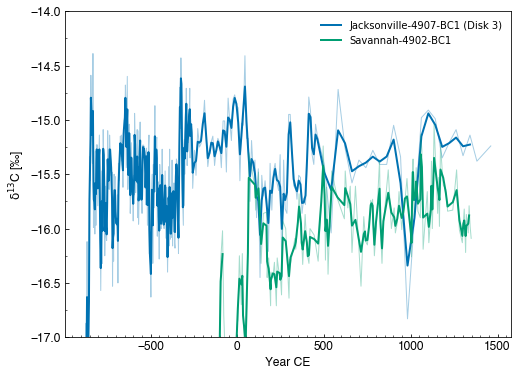

In [3]:
fig, ax = plt.subplots(figsize = (8,6))

window = 5
windowtype = 'blackman'
alpha = 0.35

data = df_jack4907
data.loc[:,'rolling'] = data["d13c"].rolling(window, win_type= windowtype, center = True).mean()
rolling_std = 1 * data["d15n"].rolling(window, center = True).std()
ax.plot('yrAD', 'd13c', data=data, color = '#0072B2', linewidth = 1, label = '', alpha = alpha)
ax.plot('yrAD', 'rolling', data=data, color = '#0072B2', linewidth = 2, label = 'Jacksonville-4907-BC1 (Disk 3)')
# ax.fill_between(data['yrAD'], data['rolling']-1*rolling_std, 
#                  data['rolling']+1*rolling_std, color='#0072B2', alpha=0.25)

data = df_sav
data.loc[:,'rolling'] = data["d13c"].rolling(window, win_type= windowtype, center = True).mean()
ax.plot('yrAD', 'd13c', data=data, color = '#009E73', linewidth = 1, label = '', alpha = alpha)
ax.plot('yrAD', 'rolling', data=data, color = '#009E73', linewidth = 2, label = 'Savannah-4902-BC1')
rolling_std = 1 * data["d15n"].rolling(window, center = True).std()
# ax.fill_between(data['yrAD'], data['rolling']-1*rolling_std, 
#                  data['rolling']+1*rolling_std, color='#009E73', alpha=0.25)

# data = df_stet
# data.loc[:,'rolling'] = data["d13c"].rolling(25, win_type= windowtype, center = True).mean()
# ax.plot('yrAD', 'd13c', data=data, color = '#D55E00', linewidth = 1, label = '', alpha = alpha)
# ax.plot('yrAD', 'rolling', data=data, color = '#D55E00', linewidth = 2, label = 'Stetson-4904-BC1')
# rolling_std = 1 * data["d15n"].rolling(window, center = True).std()
# ax.fill_between(data['yrAD'], data['rolling']-1*rolling_std, 
#                  data['rolling']+1*rolling_std, color='#D55E00', alpha=0.25)

# data = df_jack4686
# data.loc[:,'rolling'] = data["d13c"].rolling(window, win_type= windowtype, center = True, min_periods = 1).mean()
# ax.plot('yrAD', 'd13c', data=data, color = 'purple', linewidth = 1, label = '', alpha = alpha)
# ax.plot('yrAD', 'rolling', data=data, color = 'purple', linewidth = 2, label = 'Jacksonville-4684-BC1')

ax.set_xlabel("Year CE", fontname = 'Helvetica', size = 12)
ax.set_ylabel(c, fontname = 'Helvetica', size = 12)

for tick in ax.get_xticklabels():
    tick.set_fontname("Helvetica")
    tick.set_fontsize(12)
for tick in ax.get_yticklabels():
    tick.set_fontname("Helvetica")
    tick.set_fontsize(12)
    
ax.xaxis.set_minor_locator(MultipleLocator(50))
ax.yaxis.set_minor_locator(MultipleLocator(0.25))
ax.tick_params(direction='in', which = 'both')
# ax.set_xlim(-400, 1500)
ax.set_ylim(-17, -14)

plt.legend(frameon=False, loc=0)

plt.savefig('fig_bulk_c_shelf_rolling.png', dpi = 300, bbox_inches = 'tight')

/Users/jts/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':


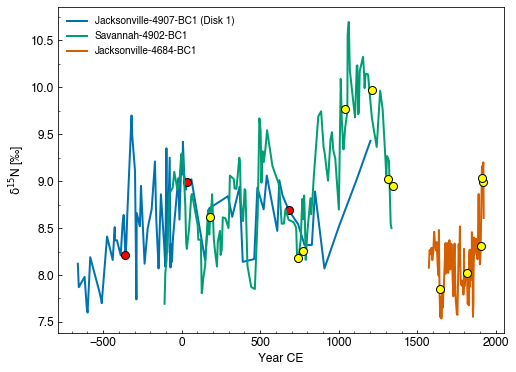

In [43]:
mpl.rc('font',family='Helvetica')
fig, ax = plt.subplots(figsize = (8,6))

window = 5
windowtype = 'blackman'
alpha = 0.35

df_jack_usgs['linear'] = 1362 - (df_jack_usgs['distance'].shift(1)/0.0054)
df_jack_usgs.set_value(0, 'linear', 1362)

data = df_jack_usgs
data.loc[:,'rolling'] = data["d15n"].rolling(3, win_type= windowtype, center = True).mean()
# ax.plot('yrAD', 'd15n', data=data, color = '#0072B2', linewidth = 1, label = '', alpha = alpha)
# ax.plot('yrAD', 'rolling', data=data, color = '#0072B2', linewidth = 2, label = 'Jacksonville-4907-BC1 (Disk 1)')
# ax.plot('yrAD', 'd15n', data=data.query('sample == 23'), label = '_nolegend_', color='yellow', marker = "o", markeredgecolor = "black", markersize = 8)
# ax.plot('yrAD', 'd15n', data=data.query('sample == 56'), label = '_nolegend_', color='yellow', marker = "o", markeredgecolor = "black", markersize = 8)
# ax.plot('yrAD', 'd15n', data=data.query('sample == 134'), label = '_nolegend_', color='yellow', marker = "o", markeredgecolor = "black", markersize = 8)
ax.plot('yrAD', 'rolling', data=data, color = '#0072B2', linewidth = 2, label = 'Jacksonville-4907-BC1 (Disk 1)')
ax.plot('yrAD', 'd15n', data=data.query('sample == 23'), label = '_nolegend_', color='red', marker = "o", markeredgecolor = "black", markersize = 8)
ax.plot('yrAD', 'd15n', data=data.query('sample == 56'), label = '_nolegend_', color='red', marker = "o", markeredgecolor = "black", markersize = 8)
ax.plot('yrAD', 'd15n', data=data.query('sample == 134'), label = '_nolegend_', color='red', marker = "o", markeredgecolor = "black", markersize = 8)

data = df_sav
data.loc[:,'rolling'] = data["d15n"].rolling(window, win_type= windowtype, center = True).mean()
# ax.plot('yrAD', 'd15n', data=data, color = '#009E73', linewidth = 1, label = '', alpha = alpha)
ax.plot('yrAD', 'rolling', data=data, color = '#009E73', linewidth = 2, label = 'Savannah-4902-BC1')
ax.plot('yrAD', 'd15n', data=data.query('sample == 2'), label = '_nolegend_', color='yellow', marker = "o", markeredgecolor = "black", markersize = 8)
ax.plot('yrAD', 'd15n', data=data.query('sample == 7'), label = '_nolegend_', color='yellow', marker = "o", markeredgecolor = "black", markersize = 8)
ax.plot('yrAD', 'd15n', data=data.query('sample == 15'), label = '_nolegend_', color='yellow', marker = "o", markeredgecolor = "black", markersize = 8)
ax.plot('yrAD', 'd15n', data=data.query('sample == 33'), label = '_nolegend_', color='yellow', marker = "o", markeredgecolor = "black", markersize = 8)
ax.plot('yrAD', 'd15n', data=data.query('sample == 61'), label = '_nolegend_', color='yellow', marker = "o", markeredgecolor = "black", markersize = 8)
ax.plot('yrAD', 'd15n', data=data.query('sample == 66'), label = '_nolegend_', color='yellow', marker = "o", markeredgecolor = "black", markersize = 8)
ax.plot('yrAD', 'd15n', data=data.query('sample == 115'), label = '_nolegend_', color='yellow', marker = "o", markeredgecolor = "black", markersize = 8)

data = df_jack4684
data.loc[:,'rolling'] = data["d15n"].rolling(window, win_type= windowtype, center = True).mean()
# ax.plot('yrAD', 'd15n', data=data, color = '#D55E00', linewidth = 1, label = '', alpha = alpha)
ax.plot('yrAD', 'rolling', data=data, color = '#D55E00', linewidth = 2, label = 'Jacksonville-4684-BC1')
ax.plot('yrAD', 'd15n', data=data.query('sample == 36'), label = '_nolegend_', color='yellow', marker = "o", markeredgecolor = "black", markersize = 8)
ax.plot('yrAD', 'd15n', data=data.query('sample == 39'), label = '_nolegend_', color='yellow', marker = "o", markeredgecolor = "black", markersize = 8)
ax.plot('yrAD', 'd15n', data=data.query('sample == 41'), label = '_nolegend_', color='yellow', marker = "o", markeredgecolor = "black", markersize = 8)
ax.plot('yrAD', 'd15n', data=data.query('sample == 85'), label = '_nolegend_', color='yellow', marker = "o", markeredgecolor = "black", markersize = 8)
ax.plot('yrAD', 'd15n', data=data.query('sample == 155'), label = '_nolegend_', color='yellow', marker = "o", markeredgecolor = "black", markersize = 8)

ax.set_xlabel("Year CE", fontname = 'Helvetica', size = 12)
ax.set_ylabel(n, fontname = 'Helvetica', size = 12)

for tick in ax.get_xticklabels():
    tick.set_fontname("Helvetica")
    tick.set_fontsize(12)
for tick in ax.get_yticklabels():
    tick.set_fontname("Helvetica")
    tick.set_fontsize(12)
    
ax.xaxis.set_minor_locator(MultipleLocator(100))
ax.yaxis.set_minor_locator(MultipleLocator(0.25))
ax.tick_params(direction='in', which = 'both')
# ax.set_xlim(-400, 1500)

plt.legend(frameon=False, loc=0)

plt.savefig('fig_bulk_n_jack_sav_4684_rolling.png', dpi = 300, bbox_inches = 'tight')

(7, 11)

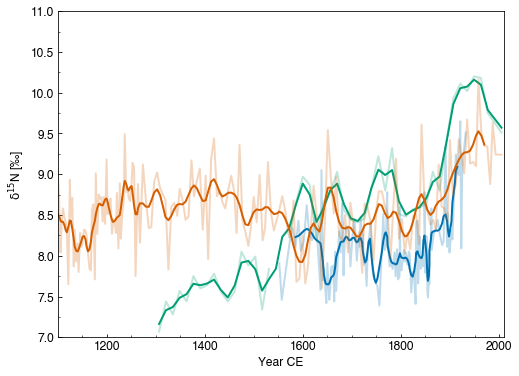

In [4]:
fig, ax = plt.subplots(figsize = (8,6))
alpha = 0.25
# window = 8
windowtype = 'blackman'

data = df_jack4684
data.loc[:,'rolling'] = data["d15n"].rolling(10, win_type= windowtype, center = True).mean()
ax.plot('yrAD', 'd15n', data=data, color = '#0072B2', linewidth = 2, label = '', alpha = alpha)
ax.plot('yrAD', 'rolling', data=data, color = '#0072B2', linewidth = 2, label = '')

data = df_jack4686_mill
data.loc[:,'rolling'] = data["d15n"].rolling(5, win_type= windowtype, min_periods = 1, center = True).mean()
ax.plot('yrAD', 'd15n', data=data, color = '#009E73', linewidth = 2, label = '', alpha = alpha)
ax.plot('yrAD', 'rolling', data=data, color = '#009E73', linewidth = 2, label = '')

data = df_stet
data.loc[:,'rolling'] = data["d15n"].rolling(10, win_type= windowtype, center = True).mean(alpha = 0)
ax.plot('yrAD', 'd15n', data=data, color = '#D55E00', linewidth = 2, label = '', alpha = alpha)
ax.plot('yrAD', 'rolling', data=data, color = '#D55E00', linewidth = 2, label = '')

ax.set_xlabel("Year CE", fontname = 'Helvetica', size = 12)
ax.set_ylabel(n, fontname = 'Helvetica', size = 12)

for tick in ax.get_xticklabels():
    tick.set_fontname("Helvetica")
    tick.set_fontsize(12)
for tick in ax.get_yticklabels():
    tick.set_fontname("Helvetica")
    tick.set_fontsize(12)
    
ax.xaxis.set_minor_locator(MultipleLocator(50))
ax.yaxis.set_minor_locator(MultipleLocator(0.25))
ax.tick_params(direction='in', which = 'both')
ax.set_xlim(1100, 2010)
ax.set_ylim(7, 11)


# plt.legend(frameon=False, loc=0)

# plt.savefig('fig_bulk_n_jack_binned.png', dpi = 300, bbox_inches = 'tight')

(-18, -14)

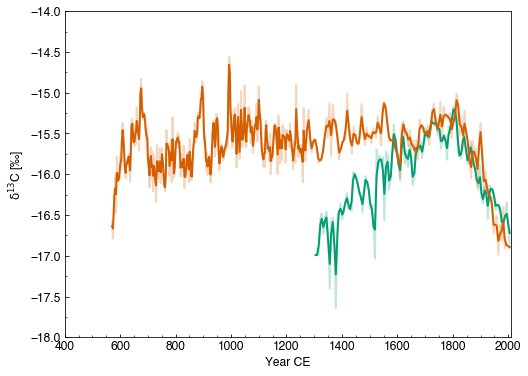

In [51]:
fig, ax = plt.subplots(figsize = (8,6))
alpha = 0.25
# window = 8
windowtype = 'blackman'

# data = df_jack4684
# data.loc[:,'rolling'] = data["d13c"].rolling(5, win_type= windowtype, center = True).mean()
# ax.plot('yrAD', 'd13c', data=data, color = '#0072B2', linewidth = 2, label = '', alpha = alpha)
# ax.plot('yrAD', 'rolling', data=data, color = '#0072B2', linewidth = 2, label = '')

# data = df_jack4686_mill
# data.loc[:,'rolling'] = data["d13c"].rolling(3, win_type= windowtype, min_periods = 1, center = True).mean()
# ax.plot('yrAD', 'd13c', data=data, color = '#009E73', linewidth = 2, label = '', alpha = alpha)
# ax.plot('yrAD', 'rolling', data=data, color = '#009E73', linewidth = 2, label = '')

data = df_jack4686
data.loc[:,'rolling'] = data["d13c"].rolling(5, win_type= windowtype, min_periods = 1, center = True).mean()
ax.plot('yrAD', 'd13c', data=data, color = '#009E73', linewidth = 2, label = '', alpha = alpha)
ax.plot('yrAD', 'rolling', data=data, color = '#009E73', linewidth = 2, label = '')

data = df_stet
data.loc[:,'rolling'] = data["d13c"].rolling(5, win_type= windowtype, center = True, min_periods = 1).mean(alpha = 0)
ax.plot('yrAD', 'd13c', data=data, color = '#D55E00', linewidth = 2, label = '', alpha = alpha)
ax.plot('yrAD', 'rolling', data=data, color = '#D55E00', linewidth = 2, label = '')

ax.set_xlabel("Year CE", fontname = 'Helvetica', size = 12)
ax.set_ylabel(c, fontname = 'Helvetica', size = 12)

for tick in ax.get_xticklabels():
    tick.set_fontname("Helvetica")
    tick.set_fontsize(12)
for tick in ax.get_yticklabels():
    tick.set_fontname("Helvetica")
    tick.set_fontsize(12)
    
ax.xaxis.set_minor_locator(MultipleLocator(50))
ax.yaxis.set_minor_locator(MultipleLocator(0.25))
ax.tick_params(direction='in', which = 'both')
ax.set_xlim(400, 2010)
ax.set_ylim(-18, -14)


# plt.legend(frameon=False, loc=0)

# plt.savefig('fig_bulk_n_jack_binned.png', dpi = 300, bbox_inches = 'tight')

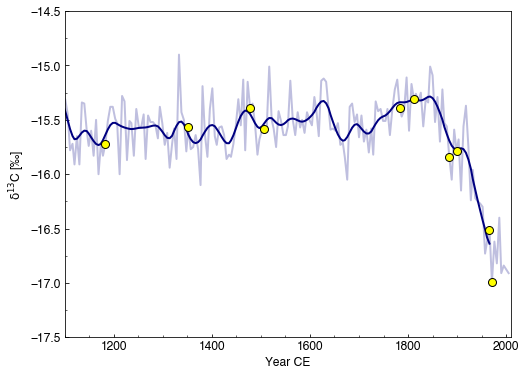

In [22]:
fig, ax = plt.subplots(figsize = (8,6))
alpha = 0.25
# window = 8
windowtype = 'blackman'

# data = df_jack4684
# data.loc[:,'rolling'] = data["d13c"].rolling(5, win_type= windowtype, center = True).mean()
# ax.plot('yrAD', 'd13c', data=data, color = '#0072B2', linewidth = 2, label = '', alpha = alpha)
# ax.plot('yrAD', 'rolling', data=data, color = '#0072B2', linewidth = 2, label = '')

# data = df_jack4686_mill
# data.loc[:,'rolling'] = data["d13c"].rolling(3, win_type= windowtype, min_periods = 1, center = True).mean()
# ax.plot('yrAD', 'd13c', data=data, color = '#009E73', linewidth = 2, label = '', alpha = alpha)
# ax.plot('yrAD', 'rolling', data=data, color = '#009E73', linewidth = 2, label = '')

# data = df_jack4686
# data.loc[:,'rolling'] = data["d13c"].rolling(5, win_type= windowtype, min_periods = 1, center = True).mean()
# ax.plot('yrAD', 'd13c', data=data, color = '#009E73', linewidth = 2, label = '', alpha = alpha)
# ax.plot('yrAD', 'rolling', data=data, color = '#009E73', linewidth = 2, label = '')

data = df_stet
data.loc[:,'rolling'] = data["d13c"].rolling(15, win_type= windowtype, center = True).mean(alpha = 0)
ax.plot('yrAD', 'd13c', data=data, color = 'navy', linewidth = 2, label = '', alpha = alpha)
ax.plot('yrAD', 'rolling', data=data, color = 'navy', linewidth = 2, label = '')
ax.plot('yrAD', 'd13c', data=data.query('sample == 7'), label = '_nolegend_', color='yellow', marker = "o", markeredgecolor = "black", markersize = 8)
ax.plot('yrAD', 'd13c', data=data.query('sample == 8'), label = '_nolegend_', color='yellow', marker = "o", markeredgecolor = "black", markersize = 8)
ax.plot('yrAD', 'd13c', data=data.query('sample == 22'), label = '_nolegend_', color='yellow', marker = "o", markeredgecolor = "black", markersize = 8)
ax.plot('yrAD', 'd13c', data=data.query('sample == 25'), label = '_nolegend_', color='yellow', marker = "o", markeredgecolor = "black", markersize = 8)
ax.plot('yrAD', 'd13c', data=data.query('sample == 40'), label = '_nolegend_', color='yellow', marker = "o", markeredgecolor = "black", markersize = 8)
ax.plot('yrAD', 'd13c', data=data.query('sample == 46'), label = '_nolegend_', color='yellow', marker = "o", markeredgecolor = "black", markersize = 8)
ax.plot('yrAD', 'd13c', data=data.query('sample == 103'), label = '_nolegend_', color='yellow', marker = "o", markeredgecolor = "black", markersize = 8)
ax.plot('yrAD', 'd13c', data=data.query('sample == 109'), label = '_nolegend_', color='yellow', marker = "o", markeredgecolor = "black", markersize = 8)
ax.plot('yrAD', 'd13c', data=data.query('sample == 135'), label = '_nolegend_', color='yellow', marker = "o", markeredgecolor = "black", markersize = 8)
ax.plot('yrAD', 'd13c', data=data.query('sample == 170'), label = '_nolegend_', color='yellow', marker = "o", markeredgecolor = "black", markersize = 8)

# ax.plot('yrAD', 'd13c', data=data.query('sample == 68'), label = '_nolegend_', color='yellow', marker = "o", markeredgecolor = "black", markersize = 8)

ax.set_xlabel("Year CE", fontname = 'Helvetica', size = 12)
ax.set_ylabel(c, fontname = 'Helvetica', size = 12)

for tick in ax.get_xticklabels():
    tick.set_fontname("Helvetica")
    tick.set_fontsize(12)
for tick in ax.get_yticklabels():
    tick.set_fontname("Helvetica")
    tick.set_fontsize(12)
    
ax.xaxis.set_minor_locator(MultipleLocator(50))
ax.yaxis.set_minor_locator(MultipleLocator(0.25))
ax.tick_params(direction='in', which = 'both')
ax.set_xlim(1100, 2010)
ax.set_ylim(-17.5, -14.5)


# plt.legend(frameon=False, loc=0)

plt.savefig('fig_bulk_c_stet_recent_rolling.png', dpi = 300, bbox_inches = 'tight')

(-1000, 1000)

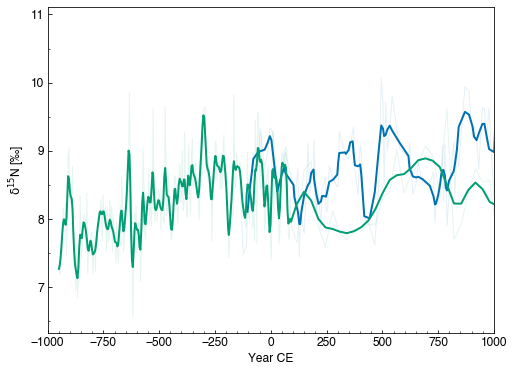

In [61]:
fig, ax = plt.subplots(figsize = (8,6))
alpha = 0.1
window = 8
windowtype = 'blackman'

data = df_sav
data.loc[:,'rolling'] = data["d15n"].rolling(window, win_type= windowtype, center = True).mean()
ax.plot('yrAD', 'd15n', data=data, color = '#0072B2', linewidth = 1, label = '', alpha = alpha)
ax.plot('yrAD', 'rolling', data=data, color = '#0072B2', linewidth = 2, label = '')

data = df_jack4907
data.loc[:,'rolling'] = data["d15n"].rolling(window, win_type= windowtype, min_periods = 1, center = True).mean()
ax.plot('yrAD', 'd15n', data=data, color = '#009E73', linewidth = 1, label = '', alpha = alpha)
ax.plot('yrAD', 'rolling', data=data, color = '#009E73', linewidth = 2, label = '')

ax.set_xlabel("Year CE", fontname = 'Helvetica', size = 12)
ax.set_ylabel(n, fontname = 'Helvetica', size = 12)

for tick in ax.get_xticklabels():
    tick.set_fontname("Helvetica")
    tick.set_fontsize(12)
for tick in ax.get_yticklabels():
    tick.set_fontname("Helvetica")
    tick.set_fontsize(12)
    
ax.xaxis.set_minor_locator(MultipleLocator(50))
ax.yaxis.set_minor_locator(MultipleLocator(0.5))
ax.tick_params(direction='in', which = 'both')
ax.set_xlim(-1000, 1000)
# ax.set_ylim(7, 11)

# plt.legend(frameon=False, loc=0)

# plt.savefig('fig_bulk_n_jack_binned.png', dpi = 300, bbox_inches = 'tight')

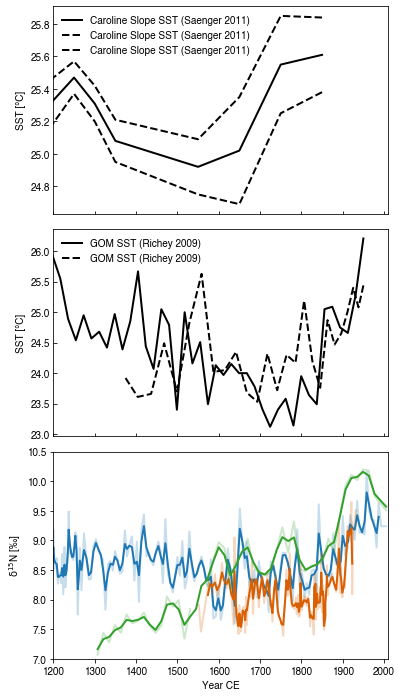

In [29]:
fig, axs = plt.subplots(3, sharex = True, figsize = (6,12),
                       gridspec_kw={'hspace': 0.075})
mpl.rc('font',family='Helvetica')
core1.loc[:,'sst_up'] = core1['SST(Anand)'] + core1['sst_se']
core1.loc[:,'sst_down'] = core1['SST(Anand)'] - core1['sst_se']

axs[1].plot('yrAD', 'SST', data = fisk, label = "GOM SST (Gulf of Mexico, Richey 2009)", color = 'black', linewidth = 2)
axs[1].plot('yrAD', 'SST', data = garrison, label = "GOM SST (Gulf of Mexico, Richey 2009)", color = 'black', linewidth = 2, linestyle = '--')
axs[0].plot('yrAD', 'SST(Anand)', data=core1, label="Caroline Slope SST (Saenger 2011)", color = 'k',  linewidth = 2)
axs[0].plot('yrAD', 'sst_up', data=core1, color = 'k',  linewidth = 2, linestyle = '--')
axs[0].plot('yrAD', 'sst_down', data=core1, color = 'k',  linewidth = 2, linestyle = '--')

# Corals
alpha = 0.25
window = 5
windowtype = 'blackman'

data = df_stet
data.loc[:,'rolling'] = data["d15n"].rolling(window, win_type= windowtype, center = True).mean()
axs[2].plot('yrAD', 'rolling', data=data, color = '#1f78b4', linewidth = 2, label = '')
axs[2].plot('yrAD', 'd15n', data = data, label = "Stetson-4904-BC1", color = '#1f78b4', linewidth = 2, alpha = alpha)

data = df_jack4684
data.loc[:,'rolling'] = data["d15n"].rolling(window, win_type= windowtype, center = True).mean()
axs[2].plot('yrAD', 'rolling', data=data, color = '#d95f02', linewidth = 2, label = '')
axs[2].plot('yrAD', 'd15n', data = data, label = "Jacksonville-4684-BC1", color = '#d95f02', linewidth = 2, alpha = alpha)

data = df_jack4686_mill
data.loc[:,'rolling'] = data["d15n"].rolling(window, win_type= windowtype, center = True, min_periods = 1).mean()
axs[2].plot('yrAD', 'rolling', data=data, color = '#33a02c', linewidth = 2, label = '')
axs[2].plot('yrAD', 'd15n', data = data, label = "Jacksonville-4686-BC1", color = '#33a02c', linewidth = 2, alpha = alpha)

# Legend
axs[0].legend(frameon=False, loc = 2)
axs[1].legend(frameon=False, loc = 0)
# axs[2].legend(frameon=False, loc = 0)

axs[2].set_xlabel("Year CE")
axs[2].set_ylim(7,10.5)
axs[2].set_ylabel(r'$\mathrm{\delta}^{15}$N ['u"\u2030]")
axs[1].set_ylabel(u'SST [\u00B0C]')
axs[0].set_ylabel(u'SST [\u00B0C]')

xminor = 100
yminor = 1

axs[0].xaxis.set_minor_locator(MultipleLocator(xminor))
axs[0].yaxis.set_minor_locator(MultipleLocator(yminor))
axs[1].xaxis.set_minor_locator(MultipleLocator(xminor))
axs[1].yaxis.set_minor_locator(MultipleLocator(yminor))

# axs[1].yaxis.set_major_locator(ticker.MaxNLocator(4))

axs[0].set_xlim(1200,2010)
axs[0].tick_params(direction='in', which = 'both')
axs[1].tick_params(direction='in', which = 'both')

plt.savefig('fig_sst_bulk_comparison.png', dpi = 300, bbox_inches = 'tight')

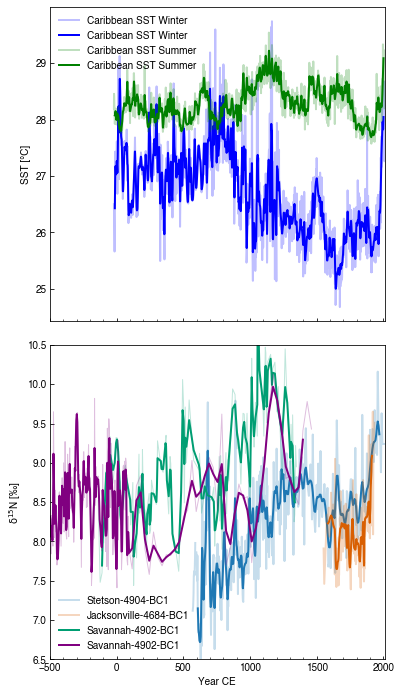

In [19]:
fig, axs = plt.subplots(2, sharex = True, figsize = (6,12),
                       gridspec_kw={'hspace': 0.075})
mpl.rc('font',family='Helvetica')

alpha = 0.25
window = 15
windowtype = 'blackman'

data = wurtzel
data.loc[:,'rolling'] = data["winter_spring"].rolling(window, win_type= windowtype, center = True).mean()
axs[0].plot('yrAD', 'winter_spring', data=wurtzel, label="Caribbean SST Winter", color = 'blue',  linewidth = 2, alpha = alpha)
axs[0].plot('yrAD', 'rolling', data=wurtzel, label="Caribbean SST Winter", color = 'blue',  linewidth = 2)

data = wurtzel
data.loc[:,'rolling'] = data["summer"].rolling(window, win_type= windowtype, center = True).mean()
axs[0].plot('yrAD', 'summer', data=wurtzel, label="Caribbean SST Summer", color = 'green',  linewidth = 2, alpha = alpha)
axs[0].plot('yrAD', 'rolling', data=wurtzel, label="Caribbean SST Summer", color = 'green',  linewidth = 2)


# Corals
window = 10

data = df_stet
data.loc[:,'rolling'] = data["d15n"].rolling(window, win_type= windowtype, center = True).mean()
axs[1].plot('yrAD', 'rolling', data=data, color = '#1f78b4', linewidth = 2, label = '')
axs[1].plot('yrAD', 'd15n', data = data, label = "Stetson-4904-BC1", color = '#1f78b4', linewidth = 2, alpha = alpha)

data = df_jack4684
data.loc[:,'rolling'] = data["d15n"].rolling(window, win_type= windowtype, center = True).mean()
axs[1].plot('yrAD', 'rolling', data=data, color = '#d95f02', linewidth = 2, label = '')
axs[1].plot('yrAD', 'd15n', data = data, label = "Jacksonville-4684-BC1", color = '#d95f02', linewidth = 2, alpha = alpha)

data = df_sav
data.loc[:,'rolling'] = data["d15n"].rolling(5, win_type= windowtype, center = True).mean()
axs[1].plot('yrAD', 'd15n', data=data, color = '#009E73', linewidth = 1, label = '', alpha = alpha)
axs[1].plot('yrAD', 'rolling', data=data, color = '#009E73', linewidth = 2, label = 'Savannah-4902-BC1')

data = df_jack4907
data.loc[:,'rolling'] = data["d15n"].rolling(5, win_type= windowtype, center = True).mean()
axs[1].plot('yrAD', 'd15n', data=data, color = 'purple', linewidth = 1, label = '', alpha = alpha)
axs[1].plot('yrAD', 'rolling', data=data, color = 'purple', linewidth = 2, label = 'Savannah-4902-BC1')

# Legend
axs[0].legend(frameon=False, loc = 2)
axs[1].legend(frameon=False, loc = 0)
# axs[2].legend(frameon=False, loc = 0)

axs[1].set_xlabel("Year CE")
axs[1].set_ylim(7,10.5)
axs[1].set_ylabel(r'$\mathrm{\delta}^{15}$N ['u"\u2030]")
axs[0].set_ylabel(u'SST [\u00B0C]')

xminor = 100
yminor = 1

axs[0].xaxis.set_minor_locator(MultipleLocator(xminor))
axs[0].yaxis.set_minor_locator(MultipleLocator(yminor))
axs[1].xaxis.set_minor_locator(MultipleLocator(xminor))
axs[1].yaxis.set_minor_locator(MultipleLocator(yminor))

# axs[1].yaxis.set_major_locator(ticker.MaxNLocator(4))

axs[0].set_xlim(-500,2010)
axs[1].set_ylim(6.5,10.5)
axs[0].tick_params(direction='in', which = 'both')
axs[1].tick_params(direction='in', which = 'both')

# plt.savefig('fig_sst_bulk_comparison.png', dpi = 300, bbox_inches = 'tight')

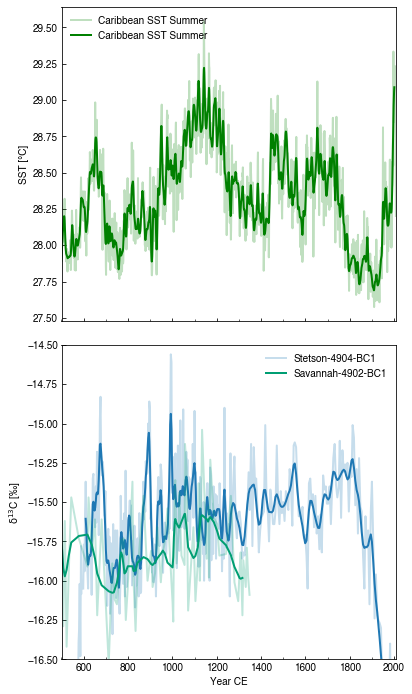

In [18]:
fig, axs = plt.subplots(2, sharex = True, figsize = (6,12),
                       gridspec_kw={'hspace': 0.075})
mpl.rc('font',family='Helvetica')

alpha = 0.25
window = 15
windowtype = 'blackman'

# data = wurtzel
# data.loc[:,'rolling'] = data["winter_spring"].rolling(window, win_type= windowtype, center = True).mean()
# axs[0].plot('yrAD', 'winter_spring', data=wurtzel, label="Caribbean SST Winter", color = 'blue',  linewidth = 2, alpha = alpha)
# axs[0].plot('yrAD', 'rolling', data=wurtzel, label="Caribbean SST Winter", color = 'blue',  linewidth = 2)

data = wurtzel
data.loc[:,'rolling'] = data["summer"].rolling(window, win_type= windowtype, center = True).mean()
axs[0].plot('yrAD', 'summer', data=wurtzel, label="Caribbean SST Summer", color = 'green',  linewidth = 2, alpha = alpha)
axs[0].plot('yrAD', 'rolling', data=wurtzel, label="Caribbean SST Summer", color = 'green',  linewidth = 2)

# axs[0].plot('yrAD', 'SST(Anand)', data=core1, label="Caroline Slope SST (Saenger 2011)", color = 'k',  linewidth = 2)
# axs[0].plot('yrAD', 'sst_up', data=core1, label="Caroline Slope SST (Saenger 2011)", color = 'k',  linewidth = 2, linestyle = '--')
# axs[0].plot('yrAD', 'sst_down', data=core1, label="Caroline Slope SST (Saenger 2011)", color = 'k',  linewidth = 2, linestyle = '--')

# Corals
window = 10

data = df_stet
data.loc[:,'rolling'] = data["d13c"].rolling(window, win_type= windowtype, center = True).mean()
axs[1].plot('yrAD', 'rolling', data=data, color = '#1f78b4', linewidth = 2, label = '')
axs[1].plot('yrAD', 'd13c', data = data, label = "Stetson-4904-BC1", color = '#1f78b4', linewidth = 2, alpha = alpha)

# data = df_jack4686
# data.loc[:,'rolling'] = data["d13c"].rolling(window, win_type= windowtype, center = True, min_periods = 1).mean()
# axs[1].plot('yrAD', 'rolling', data=data, color = '#d95f02', linewidth = 2, label = '')
# axs[1].plot('yrAD', 'd13c', data = data, label = "Jacksonville-4684-BC1", color = '#d95f02', linewidth = 2, alpha = alpha)

data = df_sav
data.loc[:,'rolling'] = data["d13c"].rolling(window, win_type= windowtype, center = True).mean()
axs[1].plot('yrAD', 'd13c', data=data, color = '#009E73', linewidth = 2, label = '', alpha = alpha)
axs[1].plot('yrAD', 'rolling', data=data, color = '#009E73', linewidth = 2, label = 'Savannah-4902-BC1')

# data = df_jack4907
# data.loc[:,'rolling'] = data["d13c"].rolling(window, win_type= windowtype, center = True, min_periods = 1).mean()
# axs[1].plot('yrAD', 'rolling', data=data, color = '#d95f02', linewidth = 2, label = '')
# axs[1].plot('yrAD', 'd13c', data = data, label = "Jacksonville-4684-BC1", color = '#d95f02', linewidth = 2, alpha = alpha)

# Legend
axs[0].legend(frameon=False, loc = 2)
axs[1].legend(frameon=False, loc = 0)
# axs[2].legend(frameon=False, loc = 0)

axs[1].set_xlabel("Year CE")
axs[1].set_ylim(-16.5,-14.5)
axs[1].set_ylabel(c)
axs[0].set_ylabel(u'SST [\u00B0C]')

xminor = 100
yminor = 1

axs[0].xaxis.set_minor_locator(MultipleLocator(xminor))
axs[0].yaxis.set_minor_locator(MultipleLocator(yminor))
axs[1].xaxis.set_minor_locator(MultipleLocator(xminor))
axs[1].yaxis.set_minor_locator(MultipleLocator(yminor))

# axs[1].yaxis.set_major_locator(ticker.MaxNLocator(4))

axs[0].set_xlim(500,2010)
axs[0].tick_params(direction='in', which = 'both')
axs[1].tick_params(direction='in', which = 'both')

# plt.savefig('fig_sst_bulk_comparison.png', dpi = 300, bbox_inches = 'tight')

/Users/jts/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


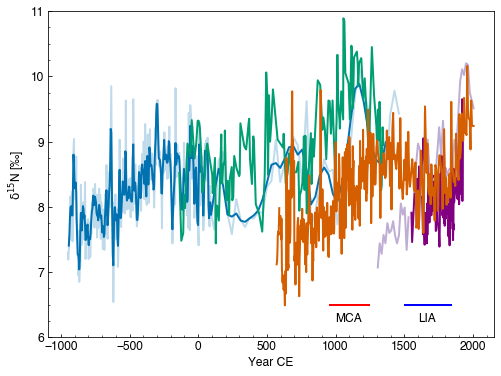

In [72]:
mpl.rc('font',family='Helvetica')
fig, ax = plt.subplots(figsize = (8,6))
alpha = 1
window = 6
windowtype = 'blackman'

# Jacksonville-4684-BC1
ax.plot('yrAD', 'd15n', data=df_jack4684, color = 'purple', linewidth = 2, label = '', alpha = alpha)

# Jacksonville-4686-BC1 MILLED
ax.plot('yrAD', 'd15n', data=df_jack4686_mill, color = '#beaed4', linewidth = 2, label = '', alpha = alpha)

# Jacksonville-4907
data = df_jack4907
data['rolling'] = data["d15n"].rolling(window, win_type= windowtype, center = True).mean()
ax.plot('yrAD', 'd15n', data=data, color = '#0072B2', linewidth = 2, label = '', alpha = 0.25)
ax.plot('yrAD', 'rolling', data=data, color = '#0072B2', linewidth = 2, label = '', alpha = alpha)

# Savannah-4902 BC1
ax.plot('yrAD', 'd15n', data=df_sav, color = '#009E73', linewidth = 2, label = '', alpha = alpha)
# ax.fill_between(x, y1, y2, facecolor = '#009E73', interpolate = True, alpha = 0.25)

# Stetson-4904-BC1
ax.plot('yrAD', 'd15n', data=df_stet, color = '#D55E00', linewidth = 2, label = '', alpha = alpha)

ax.set_xlabel("Year CE", fontname = 'Helvetica', size = 12)
ax.set_ylabel(n, fontname = 'Helvetica', size = 12)

ax.xaxis.set_minor_locator(MultipleLocator(100))
ax.yaxis.set_minor_locator(MultipleLocator(0.25))
ax.tick_params(direction='in', which = 'both')
ax.set_ylim(6,11)

for tick in ax.get_xticklabels():
    tick.set_fontname("Helvetica")
    tick.set_fontsize(12)
for tick in ax.get_yticklabels():
    tick.set_fontname("Helvetica")
    tick.set_fontsize(12)

# plt.legend(frameon=False, loc=0)

height = 6.5
ax.hlines(y=height, xmin = 950, xmax = 1250, color='r', lw=2)
ax.hlines(y=height, xmin = 1500, xmax = 1850, color='b', lw=2)
# ax.hlines(y=height,xmin = -1000, xmax = -800, color='k', lw=2)
# plt.plot(-905, height, color ='k',marker='o')
# ax.text(y=height-0.05, x=-750, s='error', fontsize = 12)
ax.text(y=height-0.25, x=1000, s='MCA', fontsize = 12)
ax.text(y=height-0.25, x=1600, s='LIA', fontsize = 12)

plt.savefig('fig_bulk_n_grouped_rolling.png', dpi = 300, bbox_inches='tight')

In [25]:
# df_stet.loc[df_stet['sample'] == 170]
df_jack_usgs.loc[df_jack_usgs['sample'] == 134]

,coral,sampler,sample,distance,d15n,d13c,treatment,perc.n,perc.c,cn.ratio,machine,yrAD,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,linear,rolling
380,jack-4907-bc1-d1,usgs,134.0,5.58,8.21,-15.55,a,NaN,NaN,NaN,NaN,-358.0,-2358.0,-358.0,NaN,NaN,NaN,337.925926,8.323333


# Binning time series
This uses a binning function from the Python library Pyleoclim, which is being developed for paleoclimate analysis.

In [16]:
# Using a binning function from Python package Pyleoclim
# Define the function

import numpy as np
import pandas as pd
import warnings
import copy
from scipy import special
import sys
from scipy import signal

def binvalues(x, y, bin_size=None, start=None, end=None):
    """ Bin the values
    Args:
        x (array): the x-axis series.
        y (array): the y-axis series.
        bin_size (float): The size of the bins. Default is the average resolution
        start (float): Where/when to start binning. Default is the minimum
        end (float): When/where to stop binning. Defulat is the maximum
    Returns:
        binned_values - the binned output \n
        bins - the bins (centered on the median, i.e., the 100-200 bin is 150) \n
        n - number of data points in each bin \n
        error -  the standard error on the mean in each bin
    """

    # Make sure x and y are numpy arrays
    x = np.array(x, dtype='float64')
    y = np.array(y, dtype='float64')

    # Get the bin_size if not available
    if bin_size is None:
        bin_size = np.nanmean(np.diff(x))

    # Get the start/end if not given
    if start is None:
        start = np.nanmin(x)
    if end is None:
        end = np.nanmax(x)

    # Set the bin medians
    bins = np.arange(start+bin_size/2, end + bin_size/2, bin_size)

    # Perform the calculation
    binned_values = []
    n = []
    error = []
    for val in np.nditer(bins):
        idx = [idx for idx, c in enumerate(x) if c >= (val-bin_size/2) and c < (val+bin_size/2)]
        if y[idx].size == 0:
            binned_values.append(np.nan)
            n.append(np.nan)
            error.append(np.nan)
        else:
            binned_values.append(np.nanmean(y[idx]))
            n.append(y[idx].size)
            error.append(np.nanstd(y[idx]))

    return bins, binned_values, n, error


# Nitrogen Binning

In [5]:
# Binning
# Jacksonville-4684 BC1
newdf = binvalues(df_jack4684["yrAD"],df_jack4684["d15n"], bin_size = 25)
newdf = np.asarray(newdf)

newdf = np.transpose(newdf)
newdf.shape

data=newdf
jack4684_binned = pd.DataFrame({'yrAD': data[:, 0], 'd15n': data[:, 1], 'Column3': data[:, 2], 'Column4': data[:, 3]})
jack4684_binned['upper'] = jack4684_binned['d15n'] + jack4684_binned['Column4']
jack4684_binned['lower'] = jack4684_binned['d15n'] - jack4684_binned['Column4']

In [6]:
# Binning
# Jacksonville-4686 BC1, doing something more specific here because samples 123, 124, and 125 were not run on EA-IRMA
# and therefore have missing values

newdf = binvalues(df_jack4686["yrAD"],df_jack4686["d15n"], bin_size = 26)
newdf = np.asarray(newdf)

newdf = np.transpose(newdf)
newdf.shape

data=newdf
jack4686_binned = pd.DataFrame({'yrAD': data[:, 0], 'd15n': data[:, 1], 'Column3': data[:, 2], 'Column4': data[:, 3]})
jack4686_binned['upper'] = jack4686_binned['d15n'] + jack4686_binned['Column4']
jack4686_binned['lower'] = jack4686_binned['d15n'] - jack4686_binned['Column4']

/Users/jts/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:55: RuntimeWarning: Mean of empty slice
/Users/jts/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


In [7]:
# Binning
# Jacksonville-4686 BC1 MILLED
newdf = binvalues(df_jack4686_mill["yrAD"],df_jack4686_mill["d15n"], bin_size = 50)
newdf = np.asarray(newdf)

newdf = np.transpose(newdf)
newdf.shape

data=newdf
jack4686mill_binned = pd.DataFrame({'yrAD': data[:, 0], 'd15n': data[:, 1], 'Column3': data[:, 2], 'Column4': data[:, 3]})
jack4686mill_binned['upper'] = jack4686mill_binned['d15n'] + jack4686mill_binned['Column4']
jack4686mill_binned['lower'] = jack4686mill_binned['d15n'] - jack4686mill_binned['Column4']

In [19]:
# Binning
# Jacksonville-4907 BC1
newdf = binvalues(df_jack4907["yrAD"],df_jack4907["d15n"], bin_size = 60)
newdf = np.asarray(newdf)

newdf = np.transpose(newdf)
newdf.shape

data=newdf
jack4907_binned = pd.DataFrame({'yrAD': data[:, 0], 'd15n': data[:, 1], 'Column3': data[:, 2], 'Column4': data[:, 3]})
jack4907_binned['upper'] = jack4907_binned['d15n'] + jack4907_binned['Column4']
jack4907_binned['lower'] = jack4907_binned['d15n'] - jack4907_binned['Column4']
jack4907_binned = jack4907_binned[:-1] # remove last row if not very many Ns created

In [31]:
# # Binning
# # Jacksonville-4907 BC1
# newdf = binvalues(df_jack4907["yrAD2"],df_jack4907["d15n"], bin_size = 300)
# newdf = np.asarray(newdf)

# newdf = np.transpose(newdf)
# newdf.shape

# data=newdf
# jack4907_binned = pd.DataFrame({'yrAD2': data[:, 0], 'd15n': data[:, 1], 'Column3': data[:, 2], 'Column4': data[:, 3]})
# jack4907_binned['upper'] = jack4907_binned['d15n'] + jack4907_binned['Column4']
# jack4907_binned['lower'] = jack4907_binned['d15n'] - jack4907_binned['Column4']

In [32]:
# Savannah-4902 BC1
newdf = binvalues(df_sav['yrAD'],df_sav['d15n'], bin_size = 125)
newdf = np.asarray(newdf)

newdf = np.transpose(newdf)
newdf.shape
data=newdf
sav_binned = pd.DataFrame({'yrAD': data[:, 0], 'd15n': data[:, 1], 'Column3': data[:, 2], 'Column4': data[:, 3]})
sav_binned['upper'] = sav_binned['d15n'] + sav_binned['Column4']
sav_binned['lower'] = sav_binned['d15n'] - sav_binned['Column4']

In [44]:
# Binning the Stetson-4904 BC1 data
newdf = binvalues(df_stet['yrAD'],df_stet['d15n'], bin_size = 80)
newdf = np.asarray(newdf)

newdf = np.transpose(newdf)
newdf.shape
data=newdf
stet_binned = pd.DataFrame({'yrAD': data[:, 0], 'd15n': data[:, 1], 'Column3': data[:, 2], 'Column4': data[:, 3]})

stet_binned['upper'] = stet_binned['d15n'] + stet_binned['Column4']
stet_binned['lower'] = stet_binned['d15n'] - stet_binned['Column4']

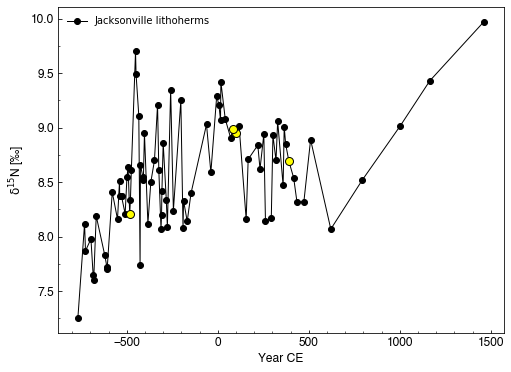

In [12]:
fig, ax = plt.subplots(figsize = (8,6))
data_original = df_jack_usgs
new_df = df_jack_usgs.query('sample == 23')
new_df2 = df_jack_usgs.query('sample == 55')
new_df3 = df_jack_usgs.query('sample == 56')
new_df4 = df_jack_usgs.query('sample == 134')
# data_binned = jack4907_binned

# x = data_binned['yrAD']
# y1 = data_binned['upper']
# y2 = data_binned['lower']

ax.plot('yrAD', 'd15n', data=data_original, color = 'black', linewidth = 1, label = 'Jacksonville lithoherms',
       marker = "o")
# ax.plot('yrAD', 'd15n', data=data_binned, color='#0072B2', linewidth = 3, label = '100-yr average')
# ax.plot(x, y1, x, y2, color = 'darkgray', linewidth=1)
plt.plot('yrAD', 'd15n', data=new_df, 
         label = '_nolegend_',
         color='yellow', marker = "o", markeredgecolor = "black", markersize = 8)
plt.plot('yrAD', 'd15n', data=new_df2, 
         label = '_nolegend_',
         color='yellow', marker = "o", markeredgecolor = "black", markersize = 8)
plt.plot('yrAD', 'd15n', data=new_df3, 
         label = '_nolegend_',
         color='yellow', marker = "o", markeredgecolor = "black", markersize = 8)
plt.plot('yrAD', 'd15n', data=new_df4, 
         label = '_nolegend_',
         color='yellow', marker = "o", markeredgecolor = "black", markersize = 8)


# ax.fill_between(x, y1, y2, facecolor = 'darkgray', interpolate = False)
ax.set_xlabel("Year CE", fontname = 'Helvetica', size = 12)
ax.set_ylabel(n, fontname = 'Helvetica', size = 12)

for tick in ax.get_xticklabels():
    tick.set_fontname("Helvetica")
    tick.set_fontsize(12)
for tick in ax.get_yticklabels():
    tick.set_fontname("Helvetica")
    tick.set_fontsize(12)
    
ax.xaxis.set_minor_locator(MultipleLocator(100))
ax.yaxis.set_minor_locator(MultipleLocator(0.25))
ax.tick_params(direction='in', which = 'both')
# ax.axhline(y=8.3, color = 'k', linewidth = 1, linestyle = '--')

plt.legend(frameon=False, loc=0)
plt.savefig('fig_bulk_n_jack_usgs.png', dpi = 300, bbox_inches = 'tight')

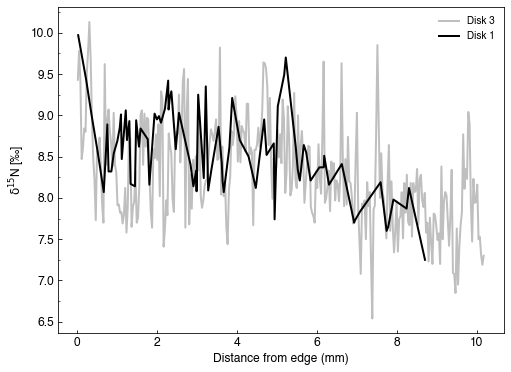

In [58]:
# fig, (ax,ax2) = plt.subplots(1, 2, figsize = (14,5))
fig, ax = plt.subplots(figsize = (8,6))
data1 = df_jack_usgs
data2 = df_jack4907

ax.plot('distance', 'd15n', data=data2, color='gray', linewidth = 2, label = 'Disk 3', alpha = 0.5)
ax.plot('distance', 'd15n', data=data1, color = 'black', linewidth = 2, label = 'Disk 1')

# ax2.plot('distance', 'd13c', data=data2, color='gray', linewidth = 2, label = 'Disk 3', alpha = 0.5)
# ax2.plot('distance', 'd13c', data=data1, color = 'black', linewidth = 2, label = 'Disk 1')

ax.set_xlabel("Distance from edge (mm)", fontname = 'Helvetica', size = 12)
ax.set_ylabel(n, fontname = 'Helvetica', size = 12)

# ax2.set_xlabel("Distance from edge (mm)", fontname = 'Helvetica', size = 12)
# ax2.set_ylabel(c, fontname = 'Helvetica', size = 12)

for tick in ax.get_xticklabels():
    tick.set_fontname("Helvetica")
    tick.set_fontsize(12)
for tick in ax.get_yticklabels():
    tick.set_fontname("Helvetica")
    tick.set_fontsize(12)
    
ax.xaxis.set_minor_locator(MultipleLocator(100))
ax.yaxis.set_minor_locator(MultipleLocator(0.25))
ax.tick_params(direction='in', which = 'both')
# ax.axhline(y=8.3, color = 'k', linewidth = 1, linestyle = '--')

plt.legend(frameon=False, loc=0)
plt.savefig('fig_bulk_n_jack_usgs.png', dpi = 300, bbox_inches = 'tight')

In [21]:
data1

,coral,sampler,sample,distance..mm.,d15n,d13c,treatment,perc.n,perc.c,cn.ratio,machine,yrAD,Unnamed: 12
318,jack-4907-bc1-d1,usgs,1,0.04,9.97,-15.00,a,NaN,NaN,NaN,NaN,1461,NaN
319,jack-4907-bc1-d1,usgs,7,0.24,9.43,-15.99,a,NaN,NaN,NaN,NaN,1165,NaN
320,jack-4907-bc1-d1,usgs,9,0.37,9.02,-15.16,a,NaN,NaN,NaN,NaN,1004,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,jack-4907-bc1-d1,usgs,212,8.25,7.87,-16.26,a,NaN,NaN,NaN,NaN,-727,NaN
397,jack-4907-bc1-d1,usgs,213,8.31,8.12,-16.38,a,NaN,NaN,NaN,NaN,-732,NaN
398,jack-4907-bc1-d1,usgs,219,8.71,7.25,-17.06,a,NaN,NaN,NaN,NaN,-769,NaN


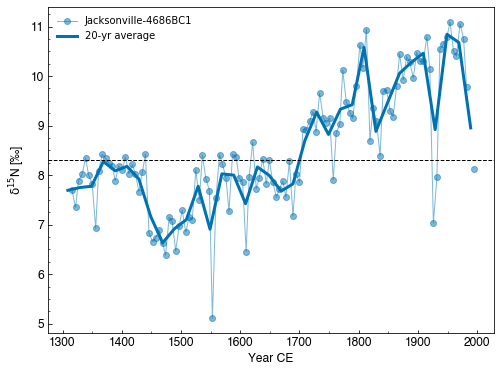

In [14]:
fig, ax = plt.subplots(figsize = (8,6))
data_original = df_jack4686
data_binned = jack4686_binned

x = data_binned['yrAD']
y1 = data_binned['upper']
y2 = data_binned['lower']

ax.plot('yrAD', 'd15n', data=data_original, color = '#0072B2', linewidth = 1, marker = 'o', label = 'Jacksonville-4686BC1', alpha = 0.5)
ax.plot('yrAD', 'd15n', data=data_binned, color='#0072B2', linewidth = 3, label = '20-yr binned')
# ax.plot(x, y1, x, y2, color = 'darkgray', linewidth=1)

# ax.fill_between(x, y1, y2, facecolor = 'darkgray', interpolate = False)
ax.set_xlabel("Year CE", fontname = 'Helvetica', size = 12)
ax.set_ylabel(n, fontname = 'Helvetica', size = 12)

for tick in ax.get_xticklabels():
    tick.set_fontname("Helvetica")
    tick.set_fontsize(12)
for tick in ax.get_yticklabels():
    tick.set_fontname("Helvetica")
    tick.set_fontsize(12)
    
ax.xaxis.set_minor_locator(MultipleLocator(50))
ax.yaxis.set_minor_locator(MultipleLocator(0.25))
ax.tick_params(direction='in', which = 'both')
ax.axhline(y=8.3, color = 'k', linewidth = 1, linestyle = '--')
# ax.set_xlim(-1200, 500)

plt.legend(frameon=False, loc=0)
# plt.savefig('fig_bulk_n_jack_binned.png', dpi = 300, bbox_inches = 'tight')

## Combined Nitrogen

/Users/jts/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


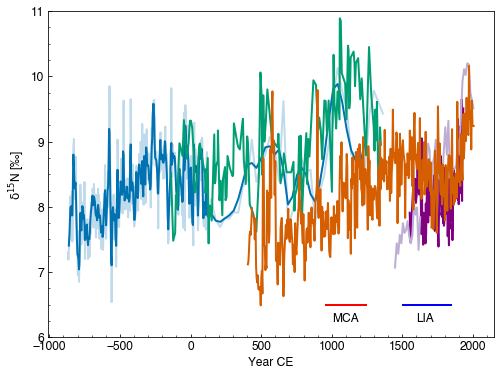

In [6]:
mpl.rc('font',family='Helvetica')
fig, ax = plt.subplots(figsize = (8,6))
alpha = 1
window = 6
windowtype = 'blackman'

# Jacksonville-4684-BC1
ax.plot('yrAD', 'd15n', data=df_jack4684, color = 'purple', linewidth = 2, label = '', alpha = alpha)

# Jacksonville-4686-BC1 MILLED
ax.plot('yrAD', 'd15n', data=df_jack4686_mill, color = '#beaed4', linewidth = 2, label = '', alpha = alpha)

# Jacksonville-4907
data = df_jack4907
data['rolling'] = data["d15n"].rolling(window, win_type= windowtype, center = True).mean()
ax.plot('yrAD', 'd15n', data=data, color = '#0072B2', linewidth = 2, label = '', alpha = 0.25)
ax.plot('yrAD', 'rolling', data=data, color = '#0072B2', linewidth = 2, label = '', alpha = alpha)

# Savannah-4902 BC1
ax.plot('yrAD', 'd15n', data=df_sav, color = '#009E73', linewidth = 2, label = '', alpha = alpha)
# ax.fill_between(x, y1, y2, facecolor = '#009E73', interpolate = True, alpha = 0.25)

# Stetson-4904-BC1
ax.plot('yrAD', 'd15n', data=df_stet, color = '#D55E00', linewidth = 2, label = '', alpha = alpha)

ax.set_xlabel("Year CE", fontname = 'Helvetica', size = 12)
ax.set_ylabel(n, fontname = 'Helvetica', size = 12)

ax.xaxis.set_minor_locator(MultipleLocator(100))
ax.yaxis.set_minor_locator(MultipleLocator(0.25))
ax.tick_params(direction='in', which = 'both')
ax.set_ylim(6,11)

for tick in ax.get_xticklabels():
    tick.set_fontname("Helvetica")
    tick.set_fontsize(12)
for tick in ax.get_yticklabels():
    tick.set_fontname("Helvetica")
    tick.set_fontsize(12)

# plt.legend(frameon=False, loc=0)

height = 6.5
ax.hlines(y=height, xmin = 950, xmax = 1250, color='r', lw=2)
ax.hlines(y=height, xmin = 1500, xmax = 1850, color='b', lw=2)
# ax.hlines(y=height,xmin = -1000, xmax = -800, color='k', lw=2)
# plt.plot(-905, height, color ='k',marker='o')
# ax.text(y=height-0.05, x=-750, s='error', fontsize = 12)
ax.text(y=height-0.25, x=1000, s='MCA', fontsize = 12)
ax.text(y=height-0.25, x=1600, s='LIA', fontsize = 12)

plt.savefig('fig_bulk_n_grouped_rolling.png', dpi = 300, bbox_inches='tight')

In [ ]:
# mpl.rc('font',family='Helvetica')
# fig, ax = plt.subplots(figsize = (8,6))
# alpha = 1
# window = 6
# windowtype = 'blackman'

# # Jacksonville-4684-BC1
# ax.plot('yrAD', 'd15n', data=df_jack4684, color = 'purple', linewidth = 2, label = '', alpha = alpha)

# # Jacksonville-4686-BC1 MILLED
# ax.plot('yrAD', 'd15n', data=df_jack4686_mill, color = '#beaed4', linewidth = 2, label = '', alpha = alpha)

# # Jacksonville-4907
# data = df_jack4907
# data['rolling'] = data["d15n"].rolling(window, win_type= windowtype, center = True).mean()
# ax.plot('yrAD', 'd15n', data=data, color = '#0072B2', linewidth = 2, label = '', alpha = 0.25)
# ax.plot('yrAD', 'rolling', data=data, color = '#0072B2', linewidth = 2, label = '', alpha = alpha)

# # Savannah-4902 BC1
# ax.plot('yrAD', 'd15n', data=df_sav, color = '#009E73', linewidth = 2, label = '', alpha = alpha)
# # ax.fill_between(x, y1, y2, facecolor = '#009E73', interpolate = True, alpha = 0.25)

# # Stetson-4904-BC1
# ax.plot('yrAD', 'd15n', data=df_stet, color = '#D55E00', linewidth = 2, label = '', alpha = alpha)

# ax.set_xlabel("Year CE", fontname = 'Helvetica', size = 12)
# ax.set_ylabel(n, fontname = 'Helvetica', size = 12)

# ax.xaxis.set_minor_locator(MultipleLocator(100))
# ax.yaxis.set_minor_locator(MultipleLocator(0.25))
# ax.tick_params(direction='in', which = 'both')
# ax.set_ylim(6,11)

# for tick in ax.get_xticklabels():
#     tick.set_fontname("Helvetica")
#     tick.set_fontsize(12)
# for tick in ax.get_yticklabels():
#     tick.set_fontname("Helvetica")
#     tick.set_fontsize(12)

# # plt.legend(frameon=False, loc=0)

# height = 6.5
# ax.hlines(y=height, xmin = 950, xmax = 1250, color='r', lw=2)
# ax.hlines(y=height, xmin = 1500, xmax = 1850, color='b', lw=2)
# # ax.hlines(y=height,xmin = -1000, xmax = -800, color='k', lw=2)
# # plt.plot(-905, height, color ='k',marker='o')
# # ax.text(y=height-0.05, x=-750, s='error', fontsize = 12)
# ax.text(y=height-0.25, x=1000, s='MCA', fontsize = 12)
# ax.text(y=height-0.25, x=1600, s='LIA', fontsize = 12)

# plt.savefig('fig_bulk_n_grouped_rolling.png', dpi = 300, bbox_inches='tight')

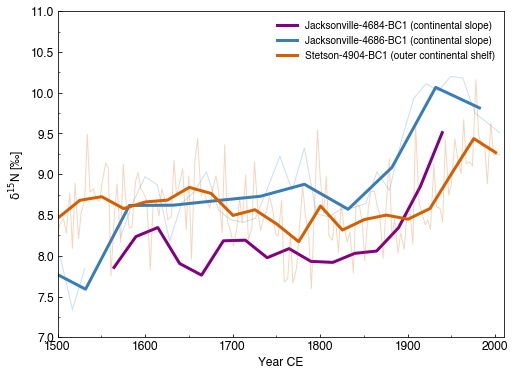

In [29]:
mpl.rc('font',family='Helvetica')

fig, ax = plt.subplots(figsize = (8,6))

linewidth = 3
# Jacksonville-4684-BC1
x = jack4684_binned['yrAD']
y1 = jack4684_binned['upper']
y2 = jack4684_binned['lower']
# ax.plot('yrAD', 'd15n', data=df_jack4684, color = 'purple', linewidth = 1, label = '', alpha = 0.25)
ax.plot('yrAD', 'd15n', data=jack4684_binned, color='purple', linewidth = linewidth, label = 'Jacksonville-4684-BC1 (continental slope)')
# ax.fill_between(x, y1, y2, facecolor = 'purple', interpolate = True, alpha = 0.25)

# Jacksonville-4686-BC1 PEELED
# x = jack4686_binned['yrAD']
# y1 = jack4686_binned['upper']
# y2 = jack4686_binned['lower']
# ax.plot('yrAD', 'd15n', data=df_jack4686, color = '#377eb8', linewidth = 1, label = '', alpha = 0.25)
# ax.plot('yrAD', 'd15n', data=jack4686_binned, color='#377eb8', linewidth = 2.5, label = 'Jacksonville-4686-BC1 (continental slope)')
# ax.fill_between(x, y1, y2, facecolor = '#377eb8', interpolate = True, alpha = 0.25)

# # Jacksonville-4686-BC1 MILLED
x = jack4686mill_binned['yrAD']
y1 = jack4686mill_binned['upper']
y2 = jack4686mill_binned['lower']
ax.plot('yrAD', 'd15n', data=df_jack4686_mill, color = '#377eb8', linewidth = 1, label = '', alpha = 0.25)
ax.plot('yrAD', 'd15n', data=jack4686mill_binned, color='#377eb8', linewidth = linewidth, label = 'Jacksonville-4686-BC1 (continental slope)')
# ax.fill_between(x, y1, y2, facecolor = '#377eb8', interpolate = True, alpha = 0.25)

# Stetson-4904-BC1
x = stet_binned['yrAD']
y1 = stet_binned['upper']
y2 = stet_binned['lower']
ax.plot('yrAD', 'd15n', data=df_stet, color = '#D55E00', linewidth = 1, label = '', alpha = 0.25)
ax.plot('yrAD', 'd15n', data=stet_binned, color='#D55E00', linewidth = linewidth, label = 'Stetson-4904-BC1 (outer continental shelf)')
# ax.fill_between(x, y1, y2, facecolor = '#D55E00', interpolate = True, alpha = 0.25)

ax.set_xlabel("Year CE", fontname = 'Helvetica', size = 12)
ax.set_ylabel(n, fontname = 'Helvetica', size = 12)
ax.set_xlim(1500,2010)
ax.set_ylim(7,11)

ax.xaxis.set_minor_locator(MultipleLocator(50))
ax.yaxis.set_minor_locator(MultipleLocator(0.25))
ax.tick_params(direction='in', which = 'both')

for tick in ax.get_xticklabels():
    tick.set_fontname("Helvetica")
    tick.set_fontsize(12)
for tick in ax.get_yticklabels():
    tick.set_fontname("Helvetica")
    tick.set_fontsize(12)

plt.legend(frameon=False, loc=0)
# ax.hlines(y=5.8, xmin = 950, xmax = 1250, color='r', lw=2)
# ax.hlines(y=5.8, xmin = 1500, xmax = 1850, color='b', lw=2)
# ax.text(y=5.5, x=1000, s='MCA', fontsize = 12)
# ax.text(y=5.5, x=1600, s='LIA', fontsize = 12)

plt.savefig('fig_stet_jack4684_jack4686.png', dpi = 300, bbox_inches='tight')

# Carbon Binning

In [94]:
# d13c
# Jacksonville-4907 BC1
data=df_jack4907
newdf = binvalues(data["yrAD"],data["d13c"], bin_size = 100)
newdf = np.asarray(newdf)

newdf = np.transpose(newdf)
newdf.shape

data=newdf
jack_binned_c = pd.DataFrame({'yrAD': data[:, 0], 'd13c': data[:, 1], 'Column3': data[:, 2], 'Column4': data[:, 3]})
jack_binned_c['upper'] = jack_binned_c['d13c'] + jack_binned_c['Column4']
jack_binned_c['lower'] = jack_binned_c['d13c'] - jack_binned_c['Column4']

In [95]:
# Binning
# Jacksonville-4686 BC1 MILLED
data = df_jack4686_mill
newdf = binvalues(data["yrAD"],data["d13c"], bin_size = 30)
newdf = np.asarray(newdf)

newdf = np.transpose(newdf)
newdf.shape

data=newdf
jack4686mill_binned_c = pd.DataFrame({'yrAD': data[:, 0], 'd13c': data[:, 1], 'Column3': data[:, 2], 'Column4': data[:, 3]})
jack4686mill_binned_c['upper'] = jack4686mill_binned_c['d13c'] + jack4686mill_binned_c['Column4']
jack4686mill_binned_c['lower'] = jack4686mill_binned_c['d13c'] - jack4686mill_binned_c['Column4']

In [96]:
# Binning
# Jacksonville-4686 BC1, doing something more specific here because samples 123, 124, and 125 were not run on EA-IRMA
# and therefore have missing values
data = df_jack4686
newdf = binvalues(data["yrAD"],data["d13c"], bin_size = 75)
newdf = np.asarray(newdf)

newdf = np.transpose(newdf)
newdf.shape

data=newdf
jack4686_binned_c = pd.DataFrame({'yrAD': data[:, 0], 'd13c': data[:, 1], 'Column3': data[:, 2], 'Column4': data[:, 3]})
jack4686_binned_c['upper'] = jack4686_binned_c['d13c'] + jack4686_binned_c['Column4']
jack4686_binned_c['lower'] = jack4686_binned_c['d13c'] - jack4686_binned_c['Column4']

In [97]:
# d13c
# Savannah-4902 BC1
data=df_sav
newdf = binvalues(data["yrAD"],data["d13c"], bin_size = 100)
newdf = np.asarray(newdf)

newdf = np.transpose(newdf)
newdf.shape

data=newdf
sav_binned_c = pd.DataFrame({'yrAD': data[:, 0], 'd13c': data[:, 1], 'Column3': data[:, 2], 'Column4': data[:, 3]})
sav_binned_c['upper'] = sav_binned_c['d13c'] + sav_binned_c['Column4']
sav_binned_c['lower'] = sav_binned_c['d13c'] - sav_binned_c['Column4']

In [98]:
# d13c
# Stetson-4904 BC1
data=df_stet
newdf = binvalues(data["yrAD"],data["d13c"], bin_size = 100)
newdf = np.asarray(newdf)

newdf = np.transpose(newdf)
newdf.shape

data=newdf
stet_binned_c = pd.DataFrame({'yrAD': data[:, 0], 'd13c': data[:, 1], 'Column3': data[:, 2], 'Column4': data[:, 3]})
stet_binned_c['upper'] = stet_binned_c['d13c'] + stet_binned_c['Column4']
stet_binned_c['lower'] = stet_binned_c['d13c'] - stet_binned_c['Column4']

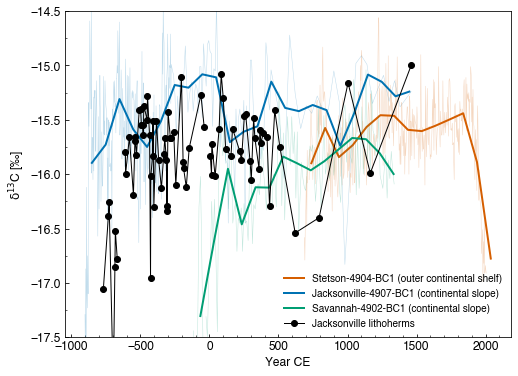

In [110]:
mpl.rc('font',family='Helvetica')

fig, ax = plt.subplots(figsize = (8,6))

# Stetson-4904
x = stet_binned_c['yrAD']
y1 = stet_binned_c['upper']
y2 = stet_binned_c['lower']
ax.plot('yrAD', 'd13c', data=df_stet, color = '#D55E00', linewidth = 0.5, alpha = 0.25, label = '')
ax.plot('yrAD', 'd13c', data=stet_binned_c, color='#D55E00', linewidth = 2, label = 'Stetson-4904-BC1 (outer continental shelf)')
# ax.fill_between(x, y1, y2, facecolor = '#D55E00', interpolate = True, alpha = 0.25)

# Jacksonville-4907

x = jack_binned_c['yrAD']
y1 = jack_binned_c['upper']
y2 = jack_binned_c['lower']
ax.plot('yrAD', 'd13c', data=df_jack4907, color = '#0072B2', linewidth = 0.5, alpha = 0.25, label = '')
ax.plot('yrAD', 'd13c', data=jack_binned_c, color='#0072B2', linewidth = 2, label = 'Jacksonville-4907-BC1 (continental slope)')
# ax.fill_between(x, y1, y2, facecolor = '#0072B2', interpolate = False, alpha = 0.25)

# Savannah-4902 BC1
x = sav_binned_c['yrAD']
y1 = sav_binned_c['upper']
y2 = sav_binned_c['lower']
ax.plot('yrAD', 'd13c', data=df_sav, color = '#009E73', linewidth = 0.5, alpha = 0.25, label = '')
ax.plot('yrAD', 'd13c', data=sav_binned_c, color='#009E73', linewidth = 2, label = 'Savannah-4902-BC1 (continental slope)')
# # ax.fill_between(x, y1, y2, facecolor = '#1f78b4', interpolate = True, alpha = 0.25)

# data_original = df_jack_usgs
# ax.plot('yrAD', 'd13c', data=data_original, color = 'black', linewidth = 1, label = 'Jacksonville lithoherms',
#        marker = "o")

# # Jacksonville-4686-BC1
# x = jack4686_binned_c['yrAD']
# y1 = jack4686_binned_c['upper']
# y2 = jack4686_binned_c['lower']
# ax.plot('yrAD', 'd13c', data=df_jack4686, color = '#beaed4', linewidth = 0.5, label = '', alpha = 0.25)
# ax.plot('yrAD', 'd13c', data=jack4686_binned_c, color='#beaed4', linewidth = 2, label = 'Jacksonville-4686-BC1 (continental slope)')

# Jacksonville-4684-BC1
# x = jack4684_binned_c['yrAD']
# y1 = jack4684_binned_c['upper']
# y2 = jack4684_binned_c['lower']
# ax.plot('yrAD', 'd13c', data=df_jack4684, color = 'red', linewidth = 2, label = '', alpha = 1)
# ax.plot('yrAD', 'd13c', data=jack4684_binned_c, color='#beaed4', linewidth = 2, label = 'Jacksonville-4686-BC1 (continental slope)')

ax.set_xlabel("Year CE", fontname = 'Helvetica', size = 12)
ax.set_ylabel(c, fontname = 'Helvetica', size = 12)
ax.set_ylim(-17.5, -14.5)

for tick in ax.get_xticklabels():
    tick.set_fontname("Helvetica")
    tick.set_fontsize(12)
for tick in ax.get_yticklabels():
    tick.set_fontname("Helvetica")
    tick.set_fontsize(12)

# ax.set_xlim(-1500,2010)
ax.xaxis.set_minor_locator(MultipleLocator(100))
ax.yaxis.set_minor_locator(MultipleLocator(0.25))
ax.tick_params(direction='in', which = 'both') 

plt.legend(frameon=False, loc=0)
plt.savefig('fig_bulk_c_jack_stet_sav_binned.png', dpi = 300, bbox_inches='tight')

In [83]:
stet_binned_c

,yrAD,d13c,Column3,Column4,upper,lower
0,498.0,-15.909734,29.0,0.361206,-15.548528,-16.270939
1,598.0,-15.600000,31.0,0.354383,-15.245617,-15.954383
2,698.0,-15.798750,32.0,0.229371,-15.569379,-16.028121
...,...,...,...,...,...,...
13,1798.0,-15.520800,25.0,0.203429,-15.317371,-15.724229
14,1898.0,-15.466667,27.0,0.276271,-15.190395,-15.742938
15,1998.0,-16.490588,17.0,0.346418,-16.144170,-16.837006


### Stetson Banks bulk d13C record

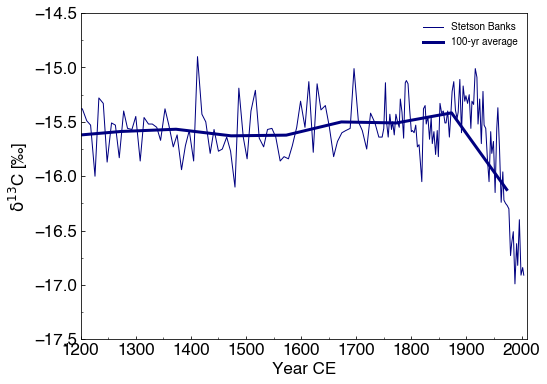

In [72]:
fig, ax = plt.subplots(figsize=(8,6))
data_original = df_stet
data_binned = stet_binned_c

x = data_binned['yrAD']
y1 = data_binned['upper']
y2 = data_binned['lower']

# color: #D55E00

ax.plot('yrAD', 'd13c', data=data_original, color = 'navy', linewidth = 1, label = 'Stetson Banks')
ax.plot('yrAD', 'd13c', data=data_binned, color='navy', linewidth = 3, label = '100-yr average')
# ax.fill_between(x, y1, y2, facecolor = '#D55E00', interpolate = True, alpha = 0.25)
ax.tick_params(direction='in')

ax.set_xlabel("Year CE", fontname = 'Helvetica', size = 17)
ax.set_ylabel(c, fontname = 'Helvetica', size = 17)
ax.set_ylim(-17.5, -14.5)
ax.set_xlim(1200, 2010)

msize = 18
col = '#F0E442'
outline = 'k'
marker = '*'
# plt.plot(data_original['yrAD'][6], data_original['d13c'][6], marker = marker, markerfacecolor = col, markersize = msize, markeredgecolor = outline)
# plt.plot(data_original['yrAD'][7], data_original['d13c'][7], marker = marker, markerfacecolor = col, markersize = msize, markeredgecolor = outline)
# plt.plot(data_original['yrAD'][21], data_original['d13c'][21], marker = marker, markerfacecolor = col, markersize = msize, markeredgecolor = outline)
# plt.plot(data_original['yrAD'][24], data_original['d13c'][24], marker = marker, markerfacecolor = col, markersize = msize, markeredgecolor = outline)
# plt.plot(data_original['yrAD'][39], data_original['d13c'][39], marker = marker, markerfacecolor = col, markersize = msize, markeredgecolor = outline)
# plt.plot(data_original['yrAD'][45], data_original['d13c'][45], marker = marker, markerfacecolor = col, markersize = msize, markeredgecolor = outline)
# plt.plot(data_original['yrAD'][45], data_original['d13c'][45], marker = marker, markerfacecolor = col, markersize = msize, markeredgecolor = outline)
# plt.plot(data_original['yrAD'][102], data_original['d13c'][102], marker = marker, markerfacecolor = col, markersize = msize, markeredgecolor = outline)
# plt.plot(data_original['yrAD'][108], data_original['d13c'][108], marker = marker, markerfacecolor = col, markersize = msize, markeredgecolor = outline)
# plt.plot(data_original['yrAD'][134], data_original['d13c'][134], marker = marker, markerfacecolor = col, markersize = msize, markeredgecolor = outline)
# plt.plot(data_original['yrAD'][169], data_original['d13c'][169], marker = marker, markerfacecolor = col, markersize = msize, markeredgecolor = outline)

for tick in ax.get_xticklabels():
    tick.set_fontname("Helvetica")
    tick.set_fontsize(17)
for tick in ax.get_yticklabels():
    tick.set_fontname("Helvetica")
    tick.set_fontsize(17)
    
ax.xaxis.set_minor_locator(MultipleLocator(50))
ax.yaxis.set_minor_locator(MultipleLocator(0.25))
ax.tick_params(direction='in', which = 'both') 
    
plt.legend(frameon=False, loc=0)
plt.savefig('fig_bulk_c_stet_binned-recent.png', dpi = 300, bbox_inches = 'tight')

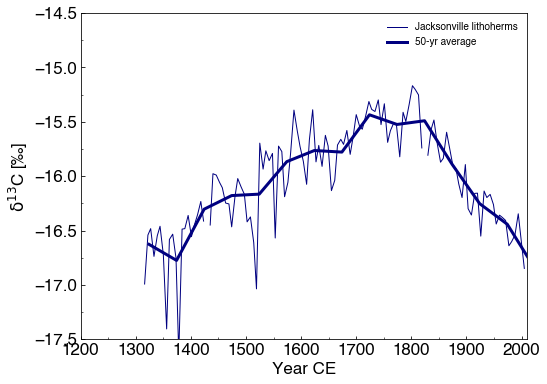

In [74]:
fig, ax = plt.subplots(figsize=(8,6))
data_original = df_jack4686
data_binned = jack4686_binned_c

x = data_binned['yrAD']
y1 = data_binned['upper']
y2 = data_binned['lower']

# color: #D55E00

ax.plot('yrAD', 'd13c', data=data_original, color = 'navy', linewidth = 1, label = 'Jacksonville lithoherms')
ax.plot('yrAD', 'd13c', data=data_binned, color='navy', linewidth = 3, label = '50-yr average')
# ax.fill_between(x, y1, y2, facecolor = '#D55E00', interpolate = True, alpha = 0.25)
ax.tick_params(direction='in')

ax.set_xlabel("Year CE", fontname = 'Helvetica', size = 17)
ax.set_ylabel(c, fontname = 'Helvetica', size = 17)
ax.set_ylim(-17.5, -14.5)
ax.set_xlim(1200, 2010)

msize = 18
col = '#F0E442'
outline = 'k'
marker = '*'
# plt.plot(data_original['yrAD'][6], data_original['d13c'][6], marker = marker, markerfacecolor = col, markersize = msize, markeredgecolor = outline)
# plt.plot(data_original['yrAD'][7], data_original['d13c'][7], marker = marker, markerfacecolor = col, markersize = msize, markeredgecolor = outline)
# plt.plot(data_original['yrAD'][21], data_original['d13c'][21], marker = marker, markerfacecolor = col, markersize = msize, markeredgecolor = outline)
# plt.plot(data_original['yrAD'][24], data_original['d13c'][24], marker = marker, markerfacecolor = col, markersize = msize, markeredgecolor = outline)
# plt.plot(data_original['yrAD'][39], data_original['d13c'][39], marker = marker, markerfacecolor = col, markersize = msize, markeredgecolor = outline)
# plt.plot(data_original['yrAD'][45], data_original['d13c'][45], marker = marker, markerfacecolor = col, markersize = msize, markeredgecolor = outline)
# plt.plot(data_original['yrAD'][45], data_original['d13c'][45], marker = marker, markerfacecolor = col, markersize = msize, markeredgecolor = outline)
# plt.plot(data_original['yrAD'][102], data_original['d13c'][102], marker = marker, markerfacecolor = col, markersize = msize, markeredgecolor = outline)
# plt.plot(data_original['yrAD'][108], data_original['d13c'][108], marker = marker, markerfacecolor = col, markersize = msize, markeredgecolor = outline)
# plt.plot(data_original['yrAD'][134], data_original['d13c'][134], marker = marker, markerfacecolor = col, markersize = msize, markeredgecolor = outline)
# plt.plot(data_original['yrAD'][169], data_original['d13c'][169], marker = marker, markerfacecolor = col, markersize = msize, markeredgecolor = outline)

for tick in ax.get_xticklabels():
    tick.set_fontname("Helvetica")
    tick.set_fontsize(17)
for tick in ax.get_yticklabels():
    tick.set_fontname("Helvetica")
    tick.set_fontsize(17)
    
ax.xaxis.set_minor_locator(MultipleLocator(50))
ax.yaxis.set_minor_locator(MultipleLocator(0.25))
ax.tick_params(direction='in', which = 'both') 
    
plt.legend(frameon=False, loc=0)
# plt.savefig('fig_bulk_c_stet_binned-recent.png', dpi = 300, bbox_inches = 'tight')

In [51]:
# fig, ax = plt.subplots(figsize=(8,6))

# data_original = df_jack4686_mill
# ax.plot('yrAD', 'd13c', data=data_original, color = '#0072B2', linewidth = 1, label = 'Jacksonville-4686BC1')

# ax.tick_params(direction='in')

# ax.set_xlabel("Year CE", fontname = 'Helvetica', size = 17)
# ax.set_ylabel(c, fontname = 'Helvetica', size = 17)
# ax.set_ylim(-17.5, -14.5)
# ax.set_xlim(1200, 2010)


# for tick in ax.get_xticklabels():
#     tick.set_fontname("Helvetica")
#     tick.set_fontsize(17)
# for tick in ax.get_yticklabels():
#     tick.set_fontname("Helvetica")
#     tick.set_fontsize(17)
    
# ax.xaxis.set_minor_locator(MultipleLocator(50))
# ax.yaxis.set_minor_locator(MultipleLocator(0.25))
# ax.tick_params(direction='in', which = 'both') 
    
# plt.legend(frameon=False, loc=0)
# # plt.savefig('fig_bulk_c_stet_binned-recent.png', dpi = 300, bbox_inches = 'tight')

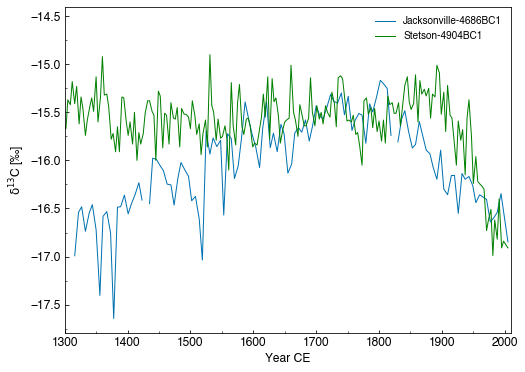

In [155]:
fig, ax = plt.subplots(figsize = (8,6))

ax.plot('yrAD', 'd13c', data=df_jack4686, color = '#0072B2', linewidth = 1, label = 'Jacksonville-4686BC1')
# ax.plot('yrAD', 'd13c', data=df_jack4684, color = 'navy', linewidth = 1, label = 'Jacksonville-4684BC1')
ax.plot('yrAD', 'd13c', data=df_stet, color = 'green', linewidth = 1, label = 'Stetson-4904BC1')
# ax.plot(x, y1, x, y2, color = 'darkgray', linewidth=1)

ax.set_xlabel("Year CE", fontname = 'Helvetica', size = 12)
ax.set_ylabel(c, fontname = 'Helvetica', size = 12)

for tick in ax.get_xticklabels():
    tick.set_fontname("Helvetica")
    tick.set_fontsize(12)
for tick in ax.get_yticklabels():
    tick.set_fontname("Helvetica")
    tick.set_fontsize(12)
    
ax.xaxis.set_minor_locator(MultipleLocator(50))
ax.yaxis.set_minor_locator(MultipleLocator(0.25))
ax.tick_params(direction='in', which = 'both')
ax.set_xlim(1300, 2010)

plt.legend(frameon=False, loc=0)
plt.savefig('fig_jack4686_stet_bulk_c.png', dpi = 300, bbox_inches = 'tight')

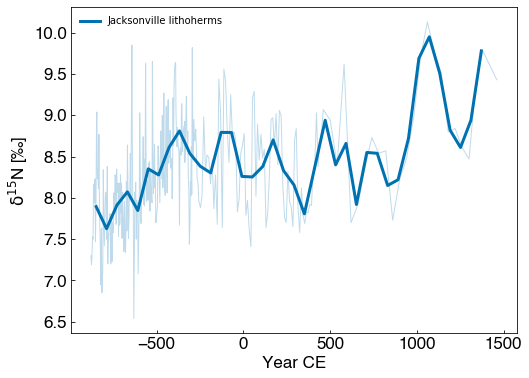

In [22]:
fig, ax = plt.subplots(figsize = (8,6))
data_original = df_jack4907
data_binned = jack4907_binned

x = data_binned['yrAD']
y1 = data_binned['upper']
y2 = data_binned['lower']

ax.plot('yrAD', 'd15n', data=data_original, color = '#0072B2', linewidth = 1, label = '', alpha = 0.25)
ax.plot('yrAD', 'd15n', data=data_binned, color='#0072B2', linewidth = 3, label = 'Jacksonville lithoherms')
# ax.plot(x, y1, x, y2, color = 'darkgray', linewidth=1)

# ax.fill_between(x, y1, y2, facecolor = 'darkgray', interpolate = True, alpha = 0.5)

ax.tick_params(direction='in')

ax.set_xlabel("Year CE", size = 17, fontname = 'Helvetica')
ax.set_ylabel(n, size = 17, fontname = 'Helvetica')

# ax.set_xlim(-50, 1400)


for tick in ax.get_xticklabels():
    tick.set_fontname("Helvetica")
    tick.set_fontsize(17)
for tick in ax.get_yticklabels():
    tick.set_fontname("Helvetica")
    tick.set_fontsize(17)

plt.legend(frameon=False, loc=0)
# plt.savefig('fig_bulk_c_jack_binned3.png', dpi = 300, bbox_inches = 'tight')

In [5]:
# fig, ax = plt.subplots()
# data_original = df_sav
# data_binned = sav_binned_c

# x = data_binned['yrAD']
# y1 = data_binned['upper']
# y2 = data_binned['lower']

# ax.plot('yrAD', 'd13c', data=data_original, color = 'k', linewidth = 0.5)
# ax.plot('yrAD', 'd13c', data=data_binned, color='k', linewidth = 2)
# # ax.plot(x, y1, x, y2, color = 'darkgray', linewidth=1)

# ax.fill_between(x, y1, y2, facecolor = 'darkgray', interpolate = True)

# ax.tick_params(direction='in')

# ax.set_xlabel("Year CE")
# ax.set_ylabel(c)

# # ax.set_xlim(-50, 1400)
# ax.set_ylim(-17, -15)

# # ax.set_xlim(0, max(df_sav['yrAD']))

# plt.savefig('fig_bulk_c_sav_binned2.png', dpi = 300, bbox_inches = 'tight')

### Carbon and Nitrogen stacked plot

In [4]:
# fig, axs = plt.subplots(2, sharex=True, figsize = (6,7), 
#                        gridspec_kw={'hspace': 0.075})

# binned_n = jack4907_binned
# binned_c = jack_binned_c
# data_orig = df_jack4907

# x = binned_c['yrAD']
# y1 = binned_c['upper']
# y2 = binned_c['lower']
# axs[0].plot('yrAD', 'd13c', data=data_orig, color = '#016c59', linewidth = 0.5, alpha = 0.5)
# axs[0].plot('yrAD', 'd13c', data=binned_c, color='#016c59', linewidth = 1.25)
# axs[0].fill_between(x, y1, y2, facecolor = '#016c59', interpolate = False, alpha = 0.25)

# x = binned_n['yrAD']
# y1 = binned_n['upper']
# y2 = binned_n['lower']
# axs[1].plot('yrAD', 'd15n', data=data_orig, color = '#0072B2', linewidth = 0.5, label = '', alpha = 0.5)
# axs[1].plot('yrAD', 'd15n', data=binned_n, color='#0072B2', linewidth = 1.25, label = 'Jacksonville-4907 BC1')
# axs[1].fill_between(x, y1, y2, facecolor = '#0072B2', interpolate = False, alpha = 0.25)

# axs[0].set_ylabel(c, fontname = 'Helvetica')
# axs[1].set_ylabel(n, fontname = 'Helvetica')
# axs[1].set_xlabel('Year CE', fontname = 'Helvetica')

# axs[0].set_ylim(-17,-14.5)

# axs[0].tick_params(direction='in')
# axs[1].tick_params(direction='in')

# for tick in axs[0].get_xticklabels():
#     tick.set_fontname("Helvetica")
# for tick in axs[0].get_yticklabels():
#     tick.set_fontname("Helvetica")
    
# for tick in axs[1].get_xticklabels():
#     tick.set_fontname("Helvetica")
# for tick in axs[1].get_yticklabels():
#     tick.set_fontname("Helvetica")

# plt.savefig('fig_bulk_jack_combined.png', dpi = 300, bbox_inches='tight')

In [3]:
# fig, axs = plt.subplots(2, sharex=True, figsize = (6,7), 
#                        gridspec_kw={'hspace': 0.075})

# binned_n = stet_binned
# binned_c = stet_binned_c
# data_orig = df_stet

# x = binned_c['yrAD']
# y1 = binned_c['upper']
# y2 = binned_c['lower']
# axs[0].plot('yrAD', 'd13c', data=data_orig, color = 'k', linewidth = 1, alpha = 0.25)
# axs[0].plot('yrAD', 'd13c', data=binned_c, color='#3182bd', linewidth = 1.25)
# axs[0].fill_between(x, y1, y2, facecolor = '#3182bd', interpolate = False, alpha = 0.25)

# x = binned_n['yrAD']
# y1 = binned_n['upper']
# y2 = binned_n['lower']
# axs[1].plot('yrAD', 'd15n', data=data_orig, color = 'k', linewidth = 1, alpha = 0.25)
# axs[1].plot('yrAD', 'd15n', data=binned_n, color='#08519c', linewidth = 1.25, label = 'Stetson-4904 BC1')
# axs[1].fill_between(x, y1, y2, facecolor = '#08519c', interpolate = False, alpha = 0.25)

# axs[0].set_ylabel(c, fontname = 'Helvetica')
# axs[1].set_ylabel(n, fontname = 'Helvetica')
# axs[1].set_xlabel('Year CE', fontname = 'Helvetica')

# # axs[0].set_ylim(-17,-14.5)

# for tick in axs[0].get_xticklabels():
#     tick.set_fontname("Helvetica")
# for tick in axs[0].get_yticklabels():
#     tick.set_fontname("Helvetica")
    
# for tick in axs[1].get_xticklabels():
#     tick.set_fontname("Helvetica")
# for tick in axs[1].get_yticklabels():
#     tick.set_fontname("Helvetica")

# axs[0].tick_params(direction='in')
# axs[1].tick_params(direction='in')

# plt.savefig('fig_bulk_stet_combined.png', dpi = 300, bbox_inches='tight')

In [41]:
df_bam = pd.read_csv('~/Documents/GitHub/data/schiff_jack4907 bam1 by treatment.csv', comment = '#')
df_bam

,Unnamed: 0,Distance,Treatment,d15N,d13C
0,63,0.17,a,9.480567,-17.654419
1,64,0.34,a,8.871778,-16.927011
2,65,0.51,a,9.242476,-16.934112
...,...,...,...,...,...
89,524,4.76,o,9.000473,-16.187885
90,525,4.93,o,9.083220,-15.718482
91,526,5.10,o,9.680609,-16.403114


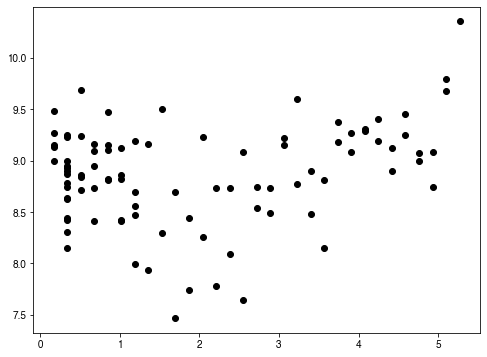

In [42]:
fig, ax = plt.subplots(figsize = (8,6))
ax.plot('Distance', 'd15N', data = df_bam, marker = "o", color = "black", linewidth = 0)

In [11]:
meand15n = np.mean(df_bam['d15N'])
meand13c = np.mean(df_bam['d13C'])
d15n_std1 = np.std(df_bam['d15N'])
d13c_std2 = np.std(df_bam['d13C'])
d15n_max = np.amax(df_bam['d15N'])
d15n_min = np.amin(df_bam['d15N'])

print(meand15n)
print(meand13c)
print(d15n_std1)
print(d13c_std2)
print(d15n_max)
print(d15n_min)

8.867960766315218
-15.817331516956516
0.49067424889903133
0.6451420257906522
10.35432286
7.469664438


In [44]:
test_stet = df_stet.loc[df_stet["yrAD"] > 1849]
test_jack4684 = df_jack4684[df_jack4684["yrAD"] > 1849]
test_jack4686 = df_jack4686_mill[df_jack4686_mill["yrAD"] > 1849]

print('Stetson')
print(test_stet.iloc[0,4])
print(test_stet.iloc[-1,4])
print(test_stet.iloc[0,4] - test_stet.iloc[-1,4])

print('Jacksonville-4684')
print(test_jack4684.iloc[0,4])
print(test_jack4684.iloc[-1,4])
print(test_jack4684.iloc[0,4] - test_jack4684.iloc[-1,4])

print('Jacksonville-4686')
print(test_jack4686.iloc[:,4].max())
print(test_jack4686.iloc[-1,4])
print(test_jack4686.iloc[:,4].max() - test_jack4686.iloc[-1,4])

Stetson
9.24
7.94
1.2999999999999998
Jacksonville-4684
9.51
7.79
1.7199999999999998
Jacksonville-4686
10.2
8.64
1.5599999999999987


In [45]:
test_stet = df_stet.loc[(df_stet["yrAD"] < 1849) | (df_stet["yrAD"] > 1499)]
test_jack4684 = df_jack4684[(df_jack4684["yrAD"] < 1849) | (df_jack4684["yrAD"] > 1499)]
test_jack4686 = df_jack4686_mill[(df_jack4686_mill["yrAD"] < 1849) | (df_jack4686_mill["yrAD"] > 1499)]

print('Stetson')
print(test_stet.iloc[0,4])
print(test_stet.iloc[-1,4])
print(test_stet.iloc[0,4] - test_stet.iloc[-1,4])

print('Jacksonville-4684')
print(test_jack4684.iloc[0,4])
print(test_jack4684.iloc[-1,4])
print(test_jack4684.iloc[0,4] - test_jack4684.iloc[-1,4])

print('Jacksonville-4686')
print(test_jack4686.iloc[0,4])
print(test_jack4686.iloc[-1,4])
print(test_jack4686.iloc[0,4] - test_jack4686.iloc[-1,4])

Stetson
9.24
7.118104894
2.121895106
Jacksonville-4684
9.51
7.91
1.5999999999999996
Jacksonville-4686
9.51
7.07
2.4399999999999995


In [144]:
# fig, ax = plt.subplots(figsize = (8,6))
# data_original = df_jack4684
# data_binned = jack4684_binned

# x = data_binned['yrAD']
# y1 = data_binned['upper']
# y2 = data_binned['lower']

# ax.plot('yrAD', 'd15n', data=data_original, color = '#0072B2', linewidth = 1, label = 'Jacksonville-4684BC1', alpha = 0.5)
# ax.plot('yrAD', 'd15n', data=data_binned, color='#0072B2', linewidth = 3, label = 'binned')
# # ax.plot(x, y1, x, y2, color = 'darkgray', linewidth=1)

# # ax.fill_between(x, y1, y2, facecolor = 'darkgray', interpolate = False)
# ax.set_xlabel("Year CE", fontname = 'Helvetica', size = 12)
# ax.set_ylabel(n, fontname = 'Helvetica', size = 12)

# for tick in ax.get_xticklabels():
#     tick.set_fontname("Helvetica")
#     tick.set_fontsize(12)
# for tick in ax.get_yticklabels():
#     tick.set_fontname("Helvetica")
#     tick.set_fontsize(12)
    
# ax.xaxis.set_minor_locator(MultipleLocator(50))
# ax.yaxis.set_minor_locator(MultipleLocator(0.25))
# ax.tick_params(direction='in', which = 'both')
# ax.axhline(y=8.3, color = 'k', linewidth = 1, linestyle = '--')
# # ax.set_xlim(-1200, 500)

# plt.legend(frameon=False, loc=0)
# # plt.savefig('fig_bulk_n_jack_binned.png', dpi = 300, bbox_inches = 'tight')

In [ ]:
# mpl.rc('font',family='Helvetica')

# fig, ax = plt.subplots(figsize = (8,6))

# linewidth = 3
# # Jacksonville-4684-BC1
# x = jack4684_binned['yrAD']
# y1 = jack4684_binned['upper']
# y2 = jack4684_binned['lower']
# # ax.plot('yrAD', 'd15n', data=df_jack4684, color = 'purple', linewidth = 1, label = '', alpha = 0.25)
# ax.plot('yrAD', 'd15n', data=jack4684_binned, color='purple', linewidth = linewidth, label = 'Jacksonville-4684-BC1 (continental slope)')
# # ax.fill_between(x, y1, y2, facecolor = 'purple', interpolate = True, alpha = 0.25)

# # Jacksonville-4686-BC1 PEELED
# # x = jack4686_binned['yrAD']
# # y1 = jack4686_binned['upper']
# # y2 = jack4686_binned['lower']
# # ax.plot('yrAD', 'd15n', data=df_jack4686, color = '#377eb8', linewidth = 1, label = '', alpha = 0.25)
# # ax.plot('yrAD', 'd15n', data=jack4686_binned, color='#377eb8', linewidth = 2.5, label = 'Jacksonville-4686-BC1 (continental slope)')
# # ax.fill_between(x, y1, y2, facecolor = '#377eb8', interpolate = True, alpha = 0.25)

# # # Jacksonville-4686-BC1 MILLED
# x = jack4686mill_binned['yrAD']
# y1 = jack4686mill_binned['upper']
# y2 = jack4686mill_binned['lower']
# ax.plot('yrAD', 'd15n', data=df_jack4686_mill, color = '#377eb8', linewidth = 1, label = '', alpha = 0.25)
# ax.plot('yrAD', 'd15n', data=jack4686mill_binned, color='#377eb8', linewidth = linewidth, label = 'Jacksonville-4686-BC1 (continental slope)')
# # ax.fill_between(x, y1, y2, facecolor = '#377eb8', interpolate = True, alpha = 0.25)

# # Stetson-4904-BC1
# x = stet_binned['yrAD']
# y1 = stet_binned['upper']
# y2 = stet_binned['lower']
# ax.plot('yrAD', 'd15n', data=df_stet, color = '#D55E00', linewidth = 1, label = '', alpha = 0.25)
# ax.plot('yrAD', 'd15n', data=stet_binned, color='#D55E00', linewidth = linewidth, label = 'Stetson-4904-BC1 (outer continental shelf)')
# # ax.fill_between(x, y1, y2, facecolor = '#D55E00', interpolate = True, alpha = 0.25)

# ax.set_xlabel("Year CE", fontname = 'Helvetica', size = 12)
# ax.set_ylabel(n, fontname = 'Helvetica', size = 12)
# ax.set_xlim(1500,2010)
# ax.set_ylim(7,11)

# ax.xaxis.set_minor_locator(MultipleLocator(50))
# ax.yaxis.set_minor_locator(MultipleLocator(0.25))
# ax.tick_params(direction='in', which = 'both')

# for tick in ax.get_xticklabels():
#     tick.set_fontname("Helvetica")
#     tick.set_fontsize(12)
# for tick in ax.get_yticklabels():
#     tick.set_fontname("Helvetica")
#     tick.set_fontsize(12)

# plt.legend(frameon=False, loc=0)
# # ax.hlines(y=5.8, xmin = 950, xmax = 1250, color='r', lw=2)
# # ax.hlines(y=5.8, xmin = 1500, xmax = 1850, color='b', lw=2)
# # ax.text(y=5.5, x=1000, s='MCA', fontsize = 12)
# # ax.text(y=5.5, x=1600, s='LIA', fontsize = 12)

# plt.savefig('fig_stet_jack4684_jack4686.png', dpi = 300, bbox_inches='tight')

In [ ]:
# mpl.rc('font',family='Helvetica')

# fig, ax = plt.subplots(figsize = (8,6))

# alpha = 0.1

# # Jacksonville-4684-BC1
# ax.plot('yrAD', 'd15n', data=df_jack4684, color = 'purple', linewidth = 0.5, label = '', alpha = alpha)
# ax.plot('yrAD', 'd15n', data=jack4684_binned, color='purple', linewidth = 2, label = 'Jacksonville-4684-BC1 (continental slope)')
# # ax.fill_between(x, y1, y2, facecolor = 'gray', interpolate = True, alpha = 0.25)

# # Jacksonville-4686-BC1 MILLED
# ax.plot('yrAD', 'd15n', data=df_jack4686_mill, color = '#beaed4', linewidth = 0.5, label = '', alpha = alpha)
# ax.plot('yrAD', 'd15n', data=jack4686mill_binned, color='#beaed4', linewidth = 2, label = 'Jacksonville-4686-BC1 (continental slope)')

# # Jacksonville-4907
# ax.plot('yrAD', 'd15n', data=df_jack4907, color = '#0072B2', linewidth = 0.5, label = '', alpha = alpha)
# ax.plot('yrAD', 'd15n', data=df_jack_usgs, color = 'black', linewidth = 2, label = '')

# # Savannah-4902 BC1
# ax.plot('yrAD', 'd15n', data=df_sav, color = '#009E73', linewidth = 0.5, label = '', alpha = alpha)
# ax.plot('yrAD', 'd15n', data=sav_binned, color='#009E73', linewidth = 2, label = "Savannah-4902-BC1 (continental slope)")
# # ax.fill_between(x, y1, y2, facecolor = '#009E73', interpolate = True, alpha = 0.25)

# # Stetson-4904-BC1
# ax.plot('yrAD', 'd15n', data=df_stet, color = '#D55E00', linewidth = 0.5, label = '', alpha = alpha)
# ax.plot('yrAD', 'd15n', data=stet_binned, color='#D55E00', linewidth = 2, label = 'Stetson-4904-BC1 (outer continental shelf)')


# ax.set_xlabel("Year CE", fontname = 'Helvetica', size = 12)
# ax.set_ylabel(n, fontname = 'Helvetica', size = 12)

# ax.xaxis.set_minor_locator(MultipleLocator(100))
# ax.yaxis.set_minor_locator(MultipleLocator(0.25))
# ax.tick_params(direction='in', which = 'both')
# ax.set_ylim(6,11)

# for tick in ax.get_xticklabels():
#     tick.set_fontname("Helvetica")
#     tick.set_fontsize(12)
# for tick in ax.get_yticklabels():
#     tick.set_fontname("Helvetica")
#     tick.set_fontsize(12)

# plt.legend(frameon=False, loc=0)

# height = 6.5
# ax.hlines(y=height, xmin = 950, xmax = 1250, color='r', lw=2)
# ax.hlines(y=height, xmin = 1500, xmax = 1850, color='b', lw=2)
# # ax.hlines(y=height,xmin = -1000, xmax = -800, color='k', lw=2)
# # plt.plot(-905, height, color ='k',marker='o')
# # ax.text(y=height-0.05, x=-750, s='error', fontsize = 12)
# ax.text(y=height-0.25, x=1000, s='MCA', fontsize = 12)
# ax.text(y=height-0.25, x=1600, s='LIA', fontsize = 12)

# plt.savefig('fig_bulk_n_grouped_binned.png', dpi = 300, bbox_inches='tight')